## Instruction
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- Describe the steps in the "Description:" field.

## Group Information

Group No: Cancer_2

- Member 1: Foo Ling Zhen
- Member 2: Dean Lau Sheng Ting
- Member 3: Looi Wei En
- Member 4: Eason Peng 


## Import libraries

In [2]:
%config Completer.use_jedi=False

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


## Load the dataset

In [3]:
df= pd.read_csv('risk_factors.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
print(f"Dataframe (source) shape: {df.shape} \n\n")

df.info()

Dataframe (source) shape: (858, 36) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs               

In [5]:
# Chek for any null values (Info: This dataset used '?' to represent missing values)
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


The dataframe has 858 entries and 36 columns, consisting of datatypes int64 and object. There no null values detected in the dataframe.

Out of 4 target columns - Hinselmann, Schiller, Cytology and Biopsy, the target 

In [6]:
# Assigning features to X
X = df.drop('Biopsy', axis = 1)
X.info()

# Shape of X
print("\nX shape:",X.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [7]:
# Assigning column 'Biopsy' as the target, y
y = df['Biopsy']
y.info()
print("\ny shape:",y.shape)

<class 'pandas.core.series.Series'>
RangeIndex: 858 entries, 0 to 857
Series name: Biopsy
Non-Null Count  Dtype
--------------  -----
858 non-null    int64
dtypes: int64(1)
memory usage: 6.8 KB

y shape: (858,)


In [152]:
y.shape
freq = y.value_counts()
print(freq)

Biopsy
0    803
1     55
Name: count, dtype: int64


## Split the dataset
Split the dataset into training, validation and test sets.

In [153]:
# X and y split into train, test in 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0, stratify=y)

# X_train and y_train split into train and vald in 50:50
X_test, X_vald, y_test, y_vald = train_test_split(X_test, y_test, test_size = 0.5,random_state=0, stratify=y_test)


In [154]:
# Shape of X train, validation and test
print("X_train shape:",X_train.shape)
print("X_vald shape :",X_vald.shape)
print("X_test shape :",X_test.shape)

X_train shape: (686, 35)
X_vald shape : (86, 35)
X_test shape : (86, 35)


In [12]:
# Shape of y train, validation and test
print("y_train shape:", y_train.shape)
print("y_vald shape :", y_vald.shape)
print("y_test shape :", y_test.shape)

y_train shape: (694,)
y_vald shape : (78,)
y_test shape : (86,)


In [13]:
print(X_train.shape)
print(X_vald.shape)
print(X_test.shape)

(694, 35)
(78, 35)
(86, 35)


In [14]:
print(y_train.shape)
print(y_vald.shape)
print(y_test.shape)

(694,)
(78,)
(86,)


## Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:
In this data preprocessing operation, we perform the following in order:
1. Missing Value Detection and Replacement
2. Outlier Detection
3. Deal with Imbalanced Data
4. Data Normalization
5. Data Standardization

We will perform the modelling on 2 sets of data later on, which are on the imbalanced data and balanced data to find out the relationship of balancing data with the types of machine learning model used and the performance of the model.

At the end of this Data Preprocessing Section,

Imbalanced data will be represented by:
- X_train_std
- X_vald_std
- X_test_std
- y_train
- y_vald
- y_test

Balanced data will be represented by:
- X_train_std_balanced
- X_vald_std_balanced
- X_test_std_balanced
- y_train_balanced
- y_vald_balanced
- y_test_balanced

### Missing Value Detection and Replacement

In [15]:
# Show the datatypes of each column
X_train.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [16]:
# Show the columns where datatype = 'object'
X_train.select_dtypes(include='object').head(10)

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
556,2.0,21.0,4.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
305,5.0,17.0,1.0,1.0,0.5,0.5132021277,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
855,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
324,?,16.0,4.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
469,2.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
38,1.0,24.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
321,2.0,19.0,1.0,0.0,0.0,0.0,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
840,2.0,16.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
112,3.0,19.0,2.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0
549,2.0,17.0,3.0,0.0,0.0,0.0,1.0,9.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?


We can observe that 26 columns have datatype 'object' although they consist mostly of floating point numbers. We can also see that some fields are filled with '?'. Thus, we can infer that the character '?' contributed to the heterogeneous data that resulted in the datatype 'object', and that '?' is used to represent missing values.

In [17]:
# Count the number of missing values in the columns
X_train[X_train == '?'].count()

Age                                     0
Number of sexual partners              22
First sexual intercourse                6
Num of pregnancies                     45
Smokes                                 12
Smokes (years)                         12
Smokes (packs/year)                    12
Hormonal Contraceptives                88
Hormonal Contraceptives (years)        88
IUD                                    93
IUD (years)                            93
STDs                                   83
STDs (number)                          83
STDs:condylomatosis                    83
STDs:cervical condylomatosis           83
STDs:vaginal condylomatosis            83
STDs:vulvo-perineal condylomatosis     83
STDs:syphilis                          83
STDs:pelvic inflammatory disease       83
STDs:genital herpes                    83
STDs:molluscum contagiosum             83
STDs:AIDS                              83
STDs:HIV                               83
STDs:Hepatitis B                  

In [18]:
# Replace '?' in the columns with nan
X_train_nan = X_train.copy()
X_train_nan.replace('?', np.nan, inplace=True)

# Create an instance of SimpleImputer with mean as the strategy
mean_imputer = SimpleImputer(strategy='mean')

# Fill in the nan values with the mean of their column values
X_train_imputed = pd.DataFrame(mean_imputer.fit_transform(X_train_nan), columns=X_train.columns)


In [19]:
# Check for null values
X_train_imputed.isna().all()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [20]:
# Check if any '?' remains in the columns
X_train_imputed[X_train_imputed=='?'].count()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [21]:
# Check if columns still consist of datatype = 'object'
X_train_imputed.dtypes

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [22]:
X_train_imputed


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,40.0,2.000000,21.0,4.000000,0.0,0.000000,0.000000,1.0,0.25,0.000000,...,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,5.000000,17.0,1.000000,1.0,0.500000,0.513202,0.0,0.00,0.000000,...,0.0,6.0,5.610169,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,2.000000,17.0,0.000000,0.0,0.000000,0.000000,1.0,0.08,0.000000,...,0.0,6.0,5.610169,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.0,2.541667,16.0,4.000000,0.0,0.000000,0.000000,1.0,3.00,0.000000,...,0.0,6.0,5.610169,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.0,2.000000,15.0,1.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,...,0.0,6.0,5.610169,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,44.0,3.000000,15.0,2.274268,1.0,1.266973,2.800000,0.0,0.00,0.106489,...,0.0,6.0,5.610169,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,19.0,1.000000,19.0,1.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,...,0.0,6.0,5.610169,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691,30.0,3.000000,15.0,0.000000,1.0,16.000000,8.000000,0.0,0.00,0.000000,...,0.0,6.0,5.610169,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692,22.0,1.000000,17.0,2.000000,0.0,0.000000,0.000000,1.0,0.16,1.000000,...,0.0,6.0,5.610169,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Repeat the steps separately for validation set and test set.

In [23]:
### Validation set

# Replace '?' in the columns with nan
X_vald_nan = X_vald.copy()
X_vald_nan.replace('?', np.nan, inplace=True)

# Fill in the nan values with the mean of their column values
X_vald_imputed = pd.DataFrame(mean_imputer.fit_transform(X_vald_nan), columns=X_vald.columns)

# Check for null values
print(X_vald_imputed.isna().all())

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [24]:
### Validation Set

# Check if any '?' remains in the columns
print(X_vald_imputed[X_vald_imputed=='?'].count())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [25]:
### Test set

# Replace '?' in the columns with nan
X_test_nan = X_test.copy()
X_test_nan.replace('?', np.nan, inplace=True)

# Fill in the nan values with the mean of their column values
X_test_imputed = pd.DataFrame(mean_imputer.fit_transform(X_test_nan), columns=X_vald.columns)

# Check for null values
X_test_imputed.isna().all()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [26]:
### Test Set

# Check if any '?' remains in the columns
print(X_test_imputed[X_test_imputed=='?'].count())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


### Outlier Detection


In [27]:
# Function to calculate the threshold to determine the outliers

def Outlier_Threshold(df, column):
    """
    Calculates the outlier threshold for a given column in a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    column (int): The index of the column for which to calculate the outlier threshold.

    Returns:
    None

    The function calculates the outlier threshold using the Interquartile Range (IQR) method.
    It determines the 75th percentile (Q3) and the 25th percentile (Q1) of the values in the column.
    Then, it calculates the IQR by subtracting Q1 from Q3.
    Finally, the function computes the outlier threshold as Q3 plus 1.5 times the IQR.
    The result is printed for the specified column in the DataFrame.
    
    """
    for num in column:
        Q3 = np.quantile(df.iloc[:,num:(num+1)],.75)
        Q1 = np.quantile(df.iloc[:,num:(num+1)],.25)
        IQR = Q3 - Q1
        outlier_threshold = Q3+(1.5*IQR)
        print(df.columns[num],": ",outlier_threshold)    

In [28]:
# Function to identify the columns with outliers in a given dataframe

def Outliers(df,outliers,std_dev_threshold, max_mean_ratio_threshold):
    """
    Identifies the columns with outliers of a DataFrame based on specified thresholds.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    outliers (list): A list to store the indices of the detected outliers.
    std_dev_threshold (float): The threshold for standard deviation to determine outliers.
    max_mean_ratio_threshold (float): The threshold for the maximum-mean ratio to determine outliers.

    Returns:
    None

    The function iterates over the columns of the DataFrame and calculates the standard deviation (std_dev) and the maximum-mean ratio (max_mean_ratio) for each column.
    If the std_dev of a column exceeds the specified std_dev_threshold or the max_mean_ratio exceeds the specified max_mean_ratio_threshold, the column index is appended to the outliers list.
    The function prints the column name, its standard deviation, and the max-mean ratio if it is identified as an outlier.
    """
    for col in df.columns:
        col_index = df.columns.get_loc(col)
        std_dev = df[col].std()
        if(df[col].mean()!=0 and df[col].max()!=1):
            max_mean_ratio = float(df[col].max()/df[col].mean())
        else:
            continue
        if (std_dev>std_dev_threshold or max_mean_ratio>max_mean_ratio_threshold):
            outliers.append(col_index)
            print(col,"Standard Deviation: ",std_dev)
            print(col,"Max Mean Ratio: ",max_mean_ratio,"\n")

#### Training set

After imputating the missing values, we can show the full proper description of the cancer dataset

In [29]:
X_train_imputed.iloc[:,0:18].describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.0,694.000000,694.000000,694.000000
mean,26.873199,2.541667,17.023256,2.274268,0.152493,1.264121,0.495853,0.643564,2.222495,0.106489,0.508419,0.104746,0.171849,0.054010,0.0,0.004910,0.054010,0.024550
std,8.407277,1.705958,2.814523,1.389084,0.356633,4.087835,2.373853,0.447874,3.370372,0.287259,1.858099,0.287539,0.516615,0.212243,0.0,0.065633,0.212243,0.145305
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.222495,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,79.000000,28.000000,32.000000,10.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [30]:
X_train_imputed.iloc[:,18:].describe(include = 'all')

,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,694.000000,694.000000,694.000000,694.0,694.000000,694.000000,694.000000,694.000000,694.00000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,0.001637,0.001637,0.001637,0.0,0.024550,0.001637,0.003273,0.090778,6.00000,5.610169,0.024496,0.010086,0.024496,0.030259,0.043228,0.085014,0.047550
std,0.037956,0.037956,0.037956,0.0,0.145305,0.037956,0.053634,0.311587,1.69372,1.640942,0.154694,0.099996,0.154694,0.171424,0.203516,0.279104,0.212967
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.00000,5.610169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.00000,5.610169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.00000,5.610169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.00000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can hypothesize that there are outliers present in some numerical columns by monitoring the standard deviation and difference between the max value and the mean value. The columns with outliers are identified by those whose standard deviation has a threshold of more than 3, or if the ratio of the max value over the mean value is more than 3 for numerical columns.

In [31]:
# Identify the columns with outliers 
# Stnadard deviation threshold = 3
# Max Mean Ratio threshold = 3
column_train = []
Outliers(X_train_imputed, column_train, std_dev_threshold = 3, max_mean_ratio_threshold = 3)
print("Columns with outliers (index): ",column_train)


Age Standard Deviation:  8.407277262272947
Age Max Mean Ratio:  2.9397319034852547 

Number of sexual partners Standard Deviation:  1.7059582088355536
Number of sexual partners Max Mean Ratio:  11.016393442622949 

Num of pregnancies Standard Deviation:  1.389083535921719
Num of pregnancies Max Mean Ratio:  4.397018970189702 

Smokes (years) Standard Deviation:  4.087835374661394
Smokes (years) Max Mean Ratio:  29.26934573535343 

Smokes (packs/year) Standard Deviation:  2.3738529387803444
Smokes (packs/year) Max Mean Ratio:  74.61882597761749 

Hormonal Contraceptives (years) Standard Deviation:  3.370372140098937
Hormonal Contraceptives (years) Max Mean Ratio:  9.898783229895109 

IUD (years) Standard Deviation:  1.858098532459772
IUD (years) Max Mean Ratio:  37.3707291530305 

STDs (number) Standard Deviation:  0.5166154284707863
STDs (number) Max Mean Ratio:  23.276190476190482 

STDs: Number of diagnosis Standard Deviation:  0.3115871482860628
STDs: Number of diagnosis Max Mean Ra

The identified columns with outliers are:

- Column[1]: Number of Sexual Partners
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)
- Column[25]: STDs: Number of diagnosis
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis

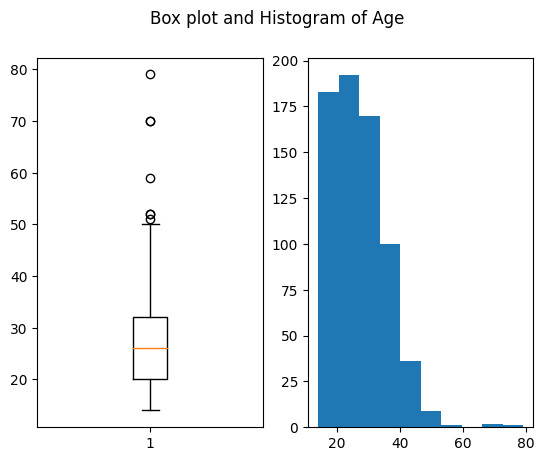

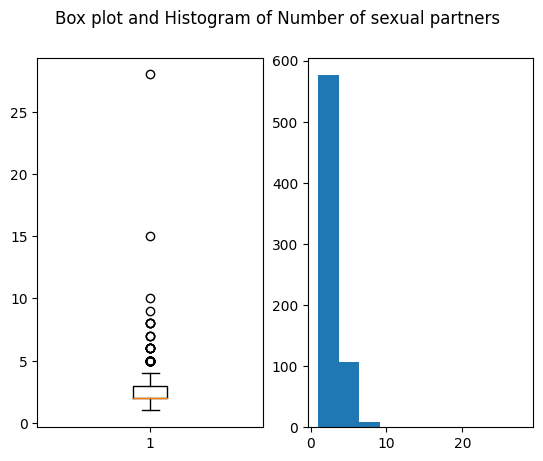

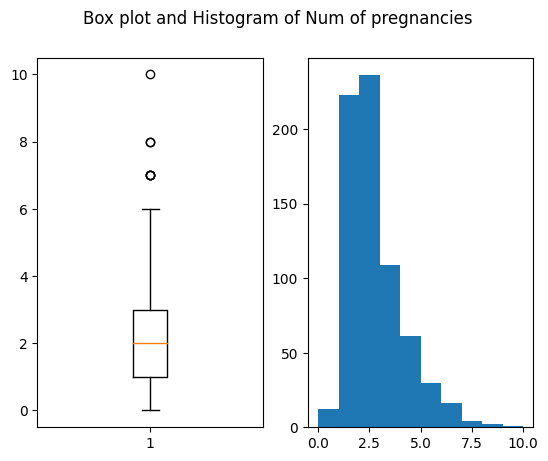

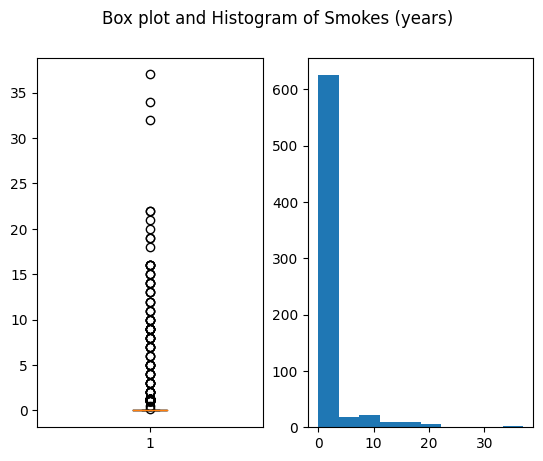

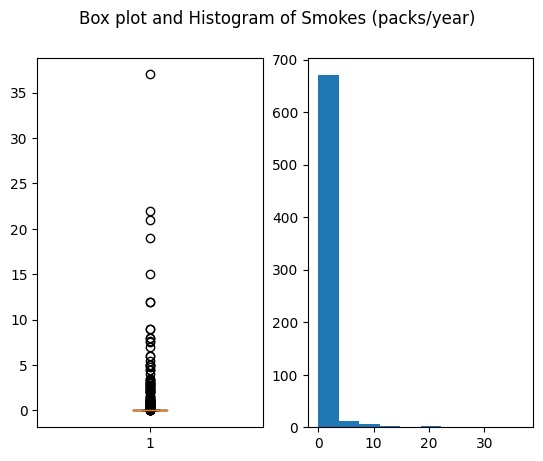

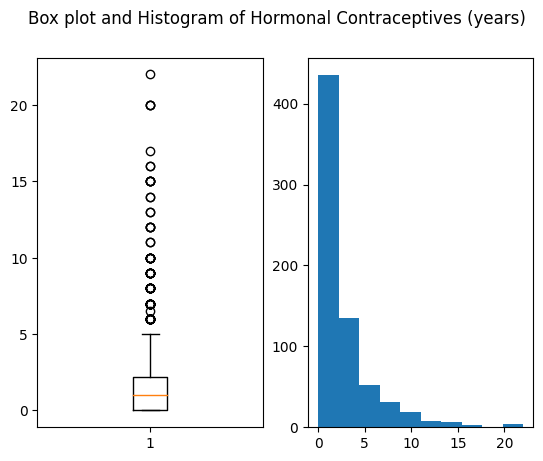

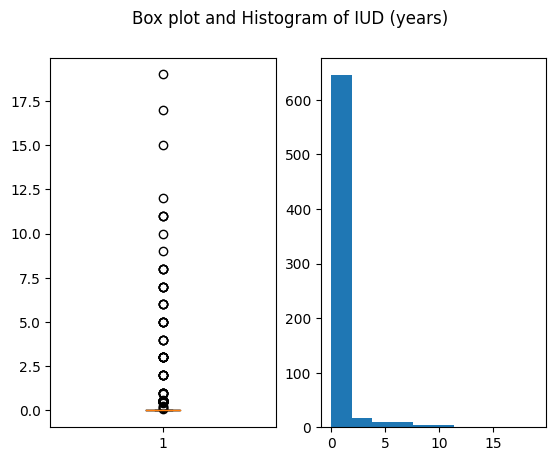

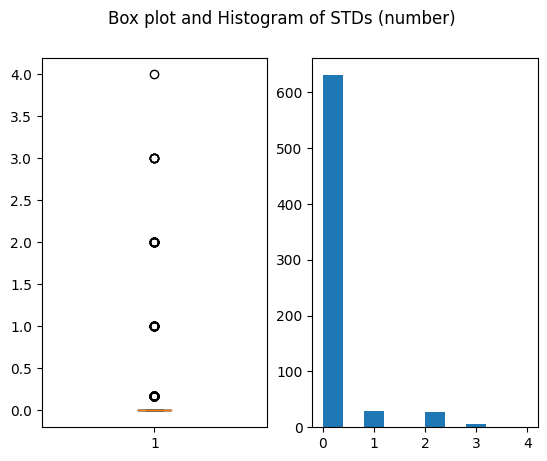

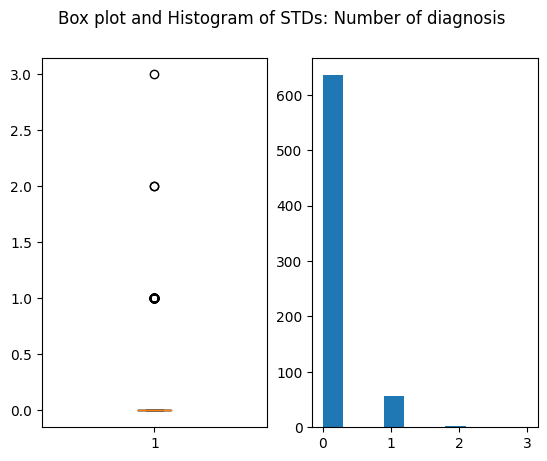

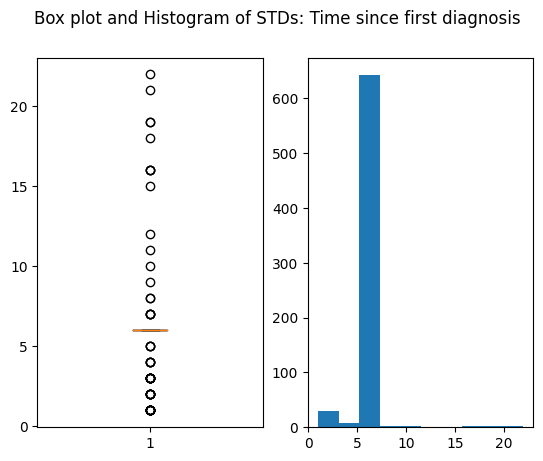

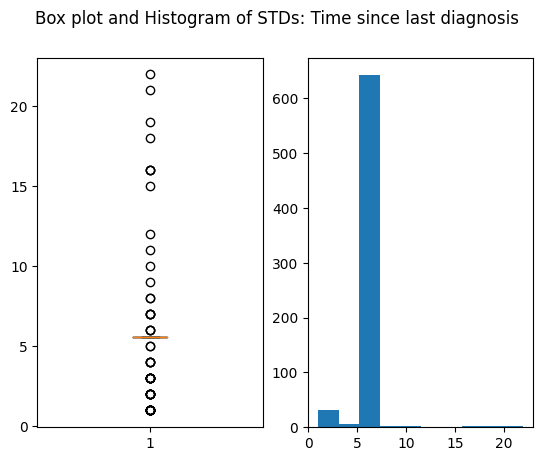

In [32]:
X_train_outlier = X_train_imputed.copy()

# Plot the distribution of the identified columns
for num in column_train:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_train_outlier.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_train_outlier.iloc[:,num:(num+1)])        # Histogram

In [33]:
# Calculate the threshold for outliers for the identified columns
Outlier_Threshold(X_train_outlier, column_train)

Age :  50.0
Number of sexual partners :  4.5
Num of pregnancies :  6.0
Smokes (years) :  0.0
Smokes (packs/year) :  0.0
Hormonal Contraceptives (years) :  5.556238450994224
IUD (years) :  0.0
STDs (number) :  0.0
STDs: Number of diagnosis :  0.0
STDs: Time since first diagnosis :  6.0
STDs: Time since last diagnosis :  5.610169491525424


From the data visualizations above, we can observe that all the graphs are skewed to the right where outliers are present. This justifies the former method of outlier identification.

The outlier threshold indicates the value where any field more than the threshold within that column is identified as an outlier. We can see that most of the columns identified have a threshold present. On the other hand, those columns of threshold 0 is due to the majority fields having the value '0', which resulted in a value of zero for both the first quartile and the third quartile.

Therefore, we will be applying **Square Root transformation** to make the data more normally distributed and reduce the impact of outliers.

In [34]:
# A copy of X_train_outlier where square root transformation will be applied
X_train_sqrt = X_train_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_train_sqrt.iloc[:,column_train] = np.sqrt(X_train_sqrt.iloc[:,column_train])
X_train_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,6.324555,1.414214,21.0,2.000000,0.0,0.000000,0.000000,1.0,0.500000,0.000000,...,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.472136,2.236068,17.0,1.000000,1.0,0.707107,0.716381,0.0,0.000000,0.000000,...,0.0,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.000000,1.414214,17.0,0.000000,0.0,0.000000,0.000000,1.0,0.282843,0.000000,...,0.0,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.744563,1.594261,16.0,2.000000,0.0,0.000000,0.000000,1.0,1.732051,0.000000,...,0.0,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.872983,1.414214,15.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,6.633250,1.732051,15.0,1.508068,1.0,1.125599,1.673320,0.0,0.000000,0.106489,...,0.0,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,4.358899,1.000000,19.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691,5.477226,1.732051,15.0,0.000000,1.0,4.000000,2.828427,0.0,0.000000,0.000000,...,0.0,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692,4.690416,1.000000,17.0,1.414214,0.0,0.000000,0.000000,1.0,0.400000,1.000000,...,0.0,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0


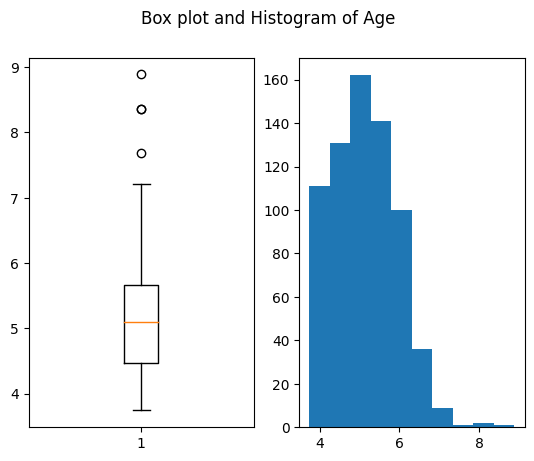

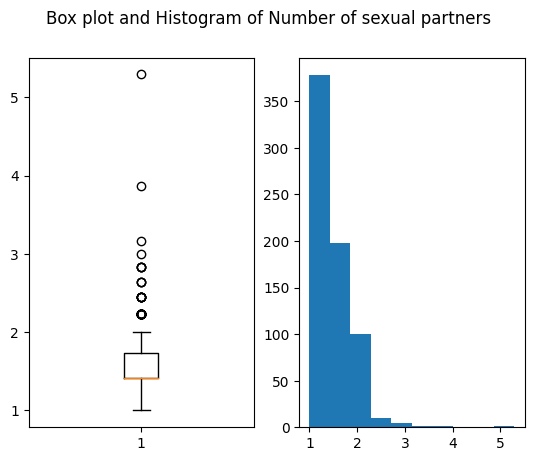

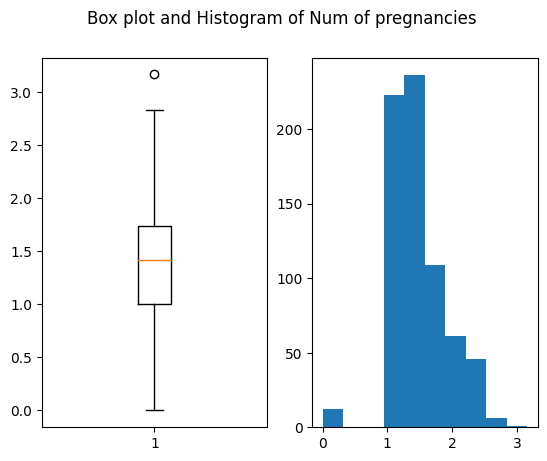

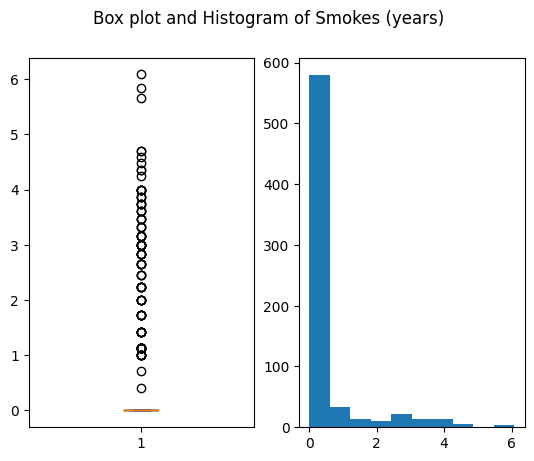

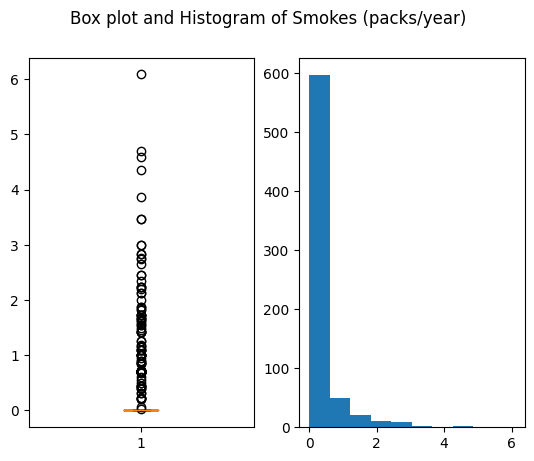

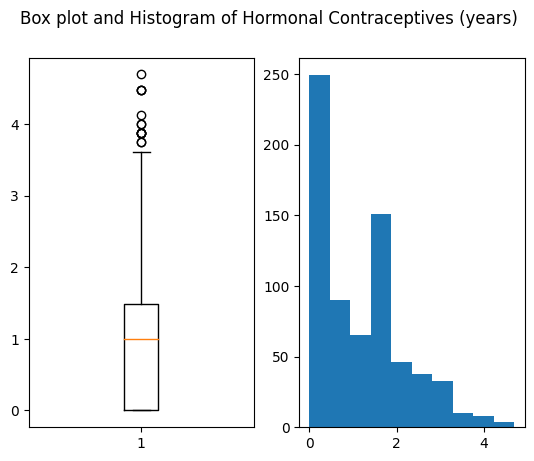

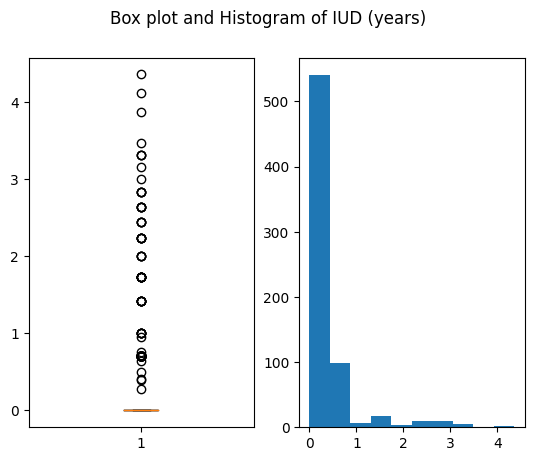

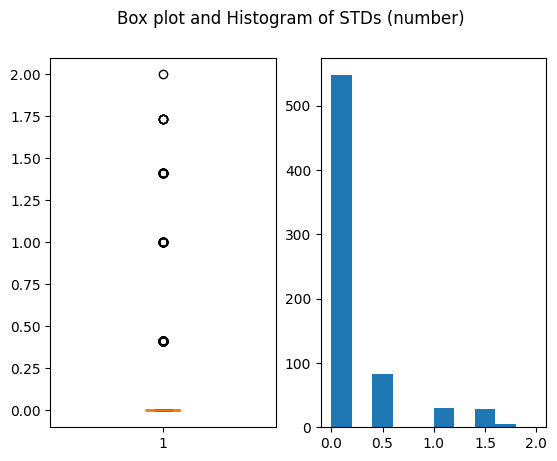

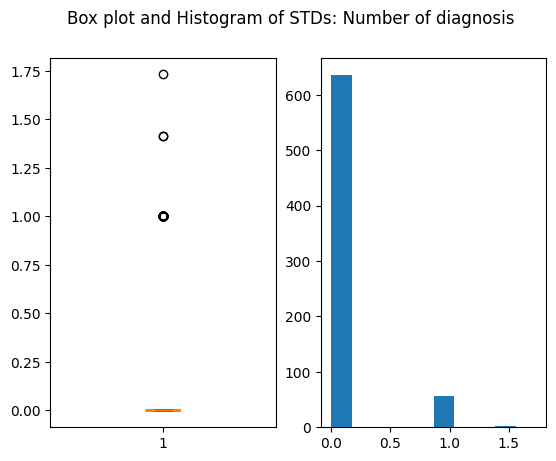

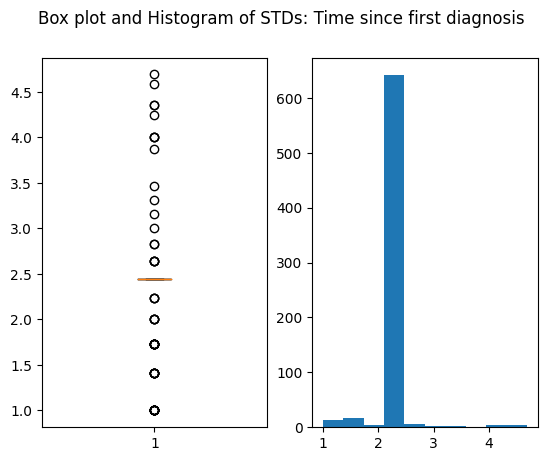

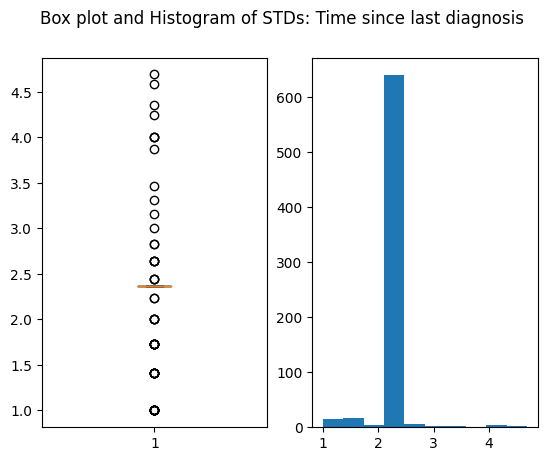

In [35]:
# Plot the distribution of the transformed outlier columns
for num in column_train:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_train_sqrt.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_train_sqrt.iloc[:,num:(num+1)])        # Histogram


#### Validation Set

In [36]:
X_vald_imputed.iloc[:,0:18].describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,78.000000
mean,25.846154,2.527027,16.428571,1.986111,0.141026,1.157269,0.346580,0.632353,2.481324,0.104478,0.366866,0.134328,0.238806,0.104478,0.0,0.014925,0.089552,0.014925
std,7.436444,1.425400,2.830394,1.075018,0.350301,3.650551,1.543005,0.453111,3.804394,0.285326,1.290519,0.318092,0.583085,0.285326,0.0,0.113107,0.266353,0.113107
min,14.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,25.000000,2.000000,16.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,30.000000,3.000000,17.750000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.100746,0.179104,0.000000,0.0,0.000000,0.000000,0.000000
max,45.000000,7.000000,29.000000,6.000000,1.000000,19.000000,12.000000,1.000000,20.000000,1.000000,8.000000,1.000000,2.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [37]:
X_vald_imputed.iloc[:,18:].describe(include = 'all')

,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,78.0,78.0,78.0,78.0,78.000000,78.0,78.0,78.000000,78.000000,78.000000,78.0,78.000000,78.0,78.000000,78.000000,78.000000,78.000000
mean,0.0,0.0,0.0,0.0,0.014925,0.0,0.0,0.089744,7.428571,7.428571,0.0,0.012821,0.0,0.012821,0.038462,0.115385,0.038462
std,0.0,0.0,0.0,0.0,0.113107,0.0,0.0,0.287664,2.226506,2.226506,0.0,0.113228,0.0,0.113228,0.193552,0.321553,0.193552
min,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,7.428571,7.428571,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,7.428571,7.428571,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,7.428571,7.428571,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,21.000000,21.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


We apply the same methods to identify the columns with outliers in the validation set.

In [38]:
# Identify the columns with outliers 
# Stnadard deviation threshold = 3
# Max Mean Ratio threshold = 3
column_vald = []
Outliers(X_vald_imputed, column_vald, std_dev_threshold = 3, max_mean_ratio_threshold = 3)
print("Columns with outliers (index): ",column_vald)

Age Standard Deviation:  7.436443995667505
Age Max Mean Ratio:  1.7410714285714286 

Num of pregnancies Standard Deviation:  1.0750180373667133
Num of pregnancies Max Mean Ratio:  3.0209790209790204 

Smokes (years) Standard Deviation:  3.65055068146449
Smokes (years) Max Mean Ratio:  16.4179649792182 

Smokes (packs/year) Standard Deviation:  1.5430052577374669
Smokes (packs/year) Max Mean Ratio:  34.62408913226424 

Hormonal Contraceptives (years) Standard Deviation:  3.804393872712427
Hormonal Contraceptives (years) Max Mean Ratio:  8.06021454394595 

IUD (years) Standard Deviation:  1.2905190830746371
IUD (years) Max Mean Ratio:  21.80634662327095 

STDs (number) Standard Deviation:  0.5830852166185626
STDs (number) Max Mean Ratio:  8.375 

Columns with outliers (index):  [0, 3, 5, 6, 8, 10, 12]


The identified columns with outliers are:
- Column[0]: Age
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)

From the plots below, we can see that the distributions of the columns stated above are skewed to the right, and outliers are indeed present.

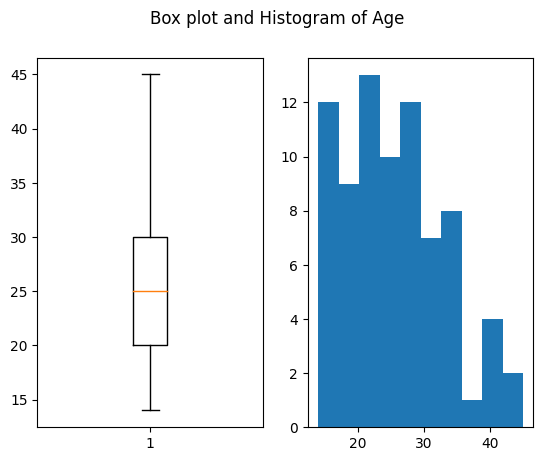

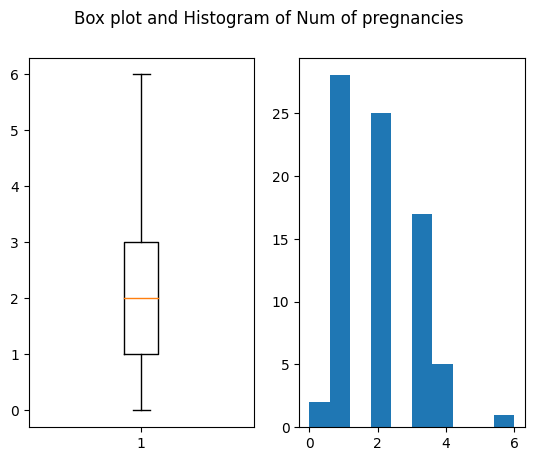

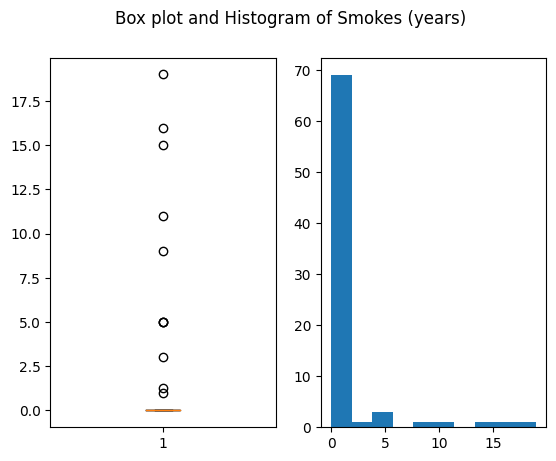

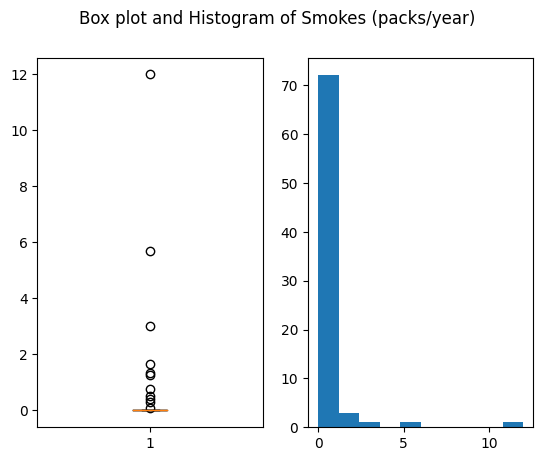

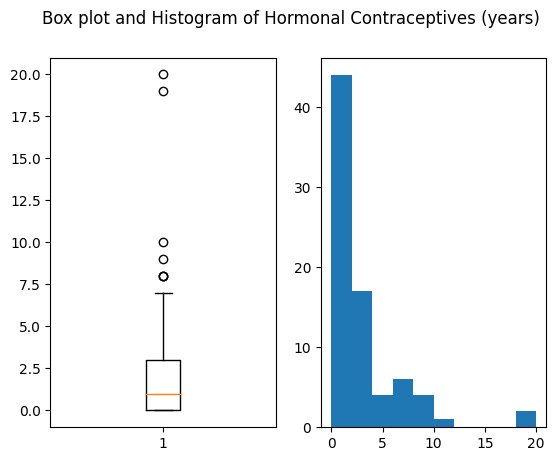

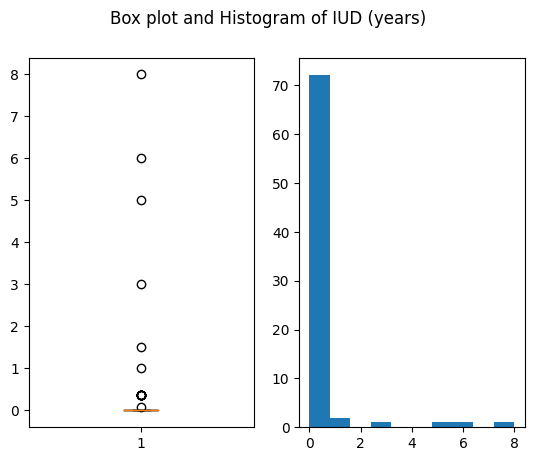

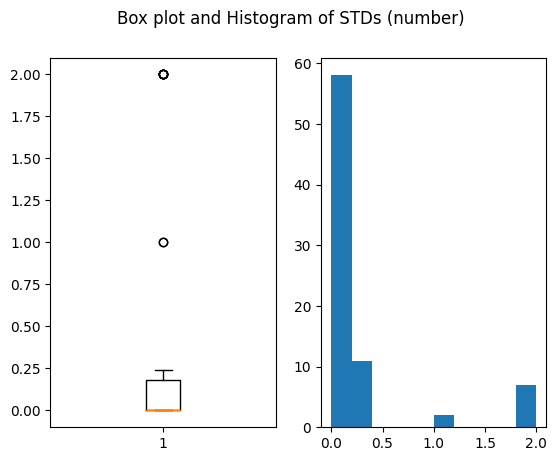

In [39]:
X_vald_outlier = X_vald_imputed.copy()

# Plot the distribution of the outlier columns
for num in column_vald:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_vald_outlier.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_vald_outlier.iloc[:,num:(num+1)])        # Histogram

In [40]:
# Calculate the threshold for outliers for the identified columns
Outlier_Threshold(X_train_outlier, column_train)

Age :  50.0
Number of sexual partners :  4.5
Num of pregnancies :  6.0
Smokes (years) :  0.0
Smokes (packs/year) :  0.0
Hormonal Contraceptives (years) :  5.556238450994224
IUD (years) :  0.0
STDs (number) :  0.0
STDs: Number of diagnosis :  0.0
STDs: Time since first diagnosis :  6.0
STDs: Time since last diagnosis :  5.610169491525424


In [41]:
# A copy of X_vald_sqrt where square root transformation will be applied
X_vald_sqrt = X_vald_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_vald_sqrt.iloc[:,column_vald] = np.sqrt(X_vald_sqrt.iloc[:,column_vald])
X_vald_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,3.872983,4.000000,14.0,1.000000,1.0,1.000000,0.316228,1.000000,0.282843,0.000000,...,0.0,7.428571,7.428571,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.324555,2.000000,17.0,1.732051,0.0,0.000000,0.000000,1.000000,4.358899,0.000000,...,0.0,7.428571,7.428571,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.582576,2.000000,16.0,1.000000,0.0,0.000000,0.000000,1.000000,0.707107,0.000000,...,0.0,7.428571,7.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000000,2.000000,14.0,1.732051,1.0,2.236068,0.632456,1.000000,2.645751,0.000000,...,0.0,7.428571,7.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.916080,2.000000,20.0,1.414214,0.0,0.000000,0.000000,1.000000,1.414214,0.000000,...,0.0,7.428571,7.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,5.385165,3.000000,15.0,1.732051,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,16.000000,16.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,4.000000,1.000000,15.0,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,7.428571,7.428571,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75,5.567764,2.527027,18.0,1.414214,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,7.428571,7.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,4.690416,2.000000,17.0,1.000000,0.0,0.000000,0.000000,0.632353,1.575222,0.104478,...,0.0,7.428571,7.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0


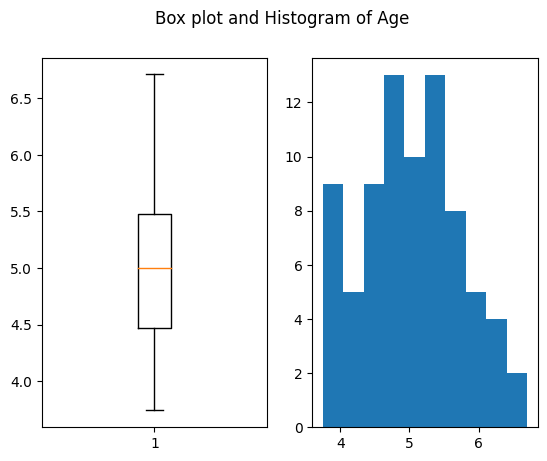

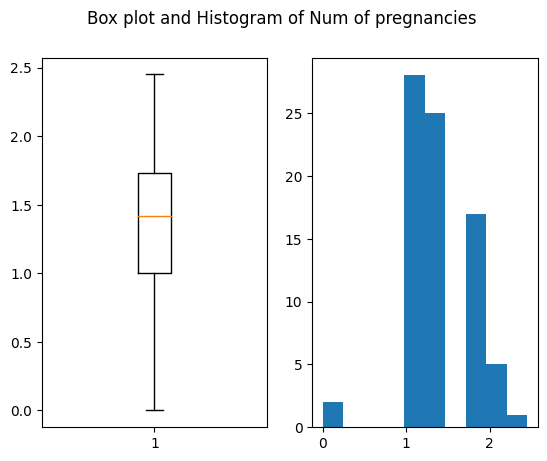

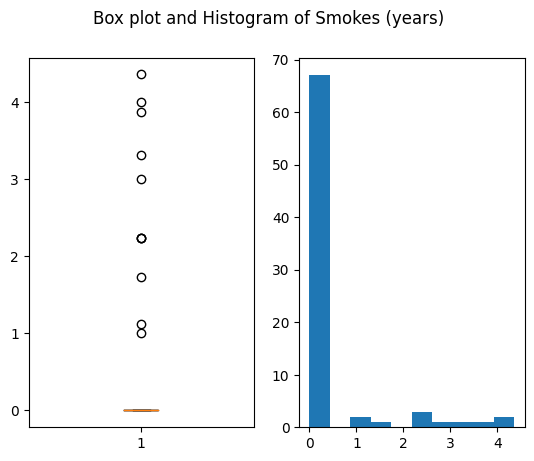

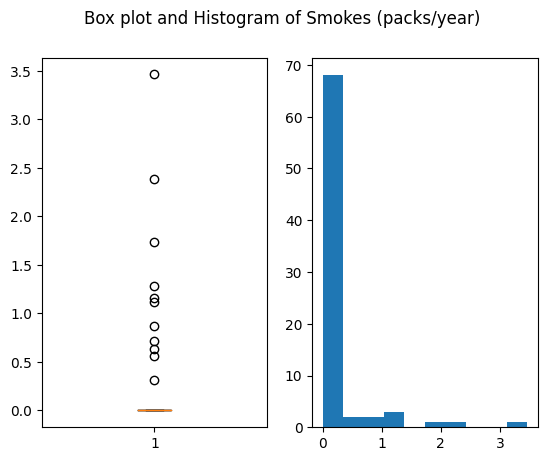

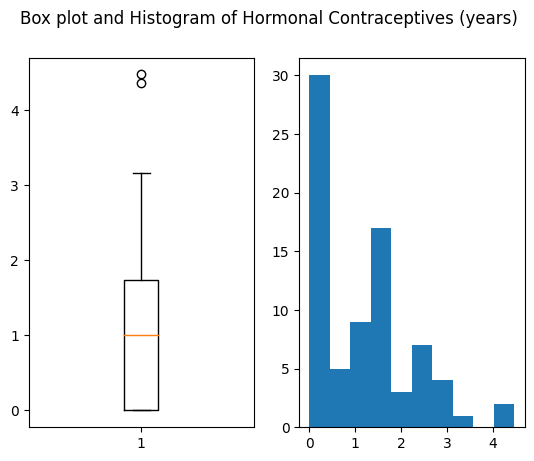

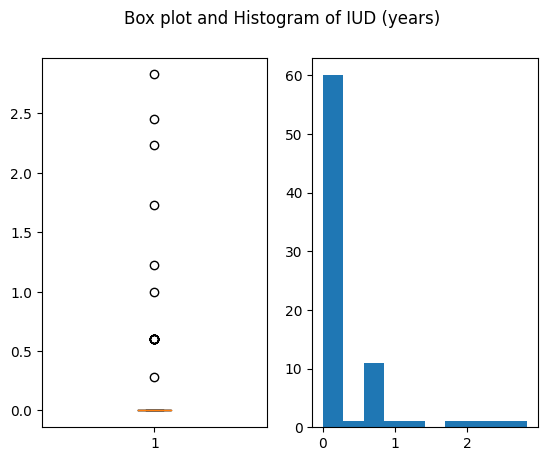

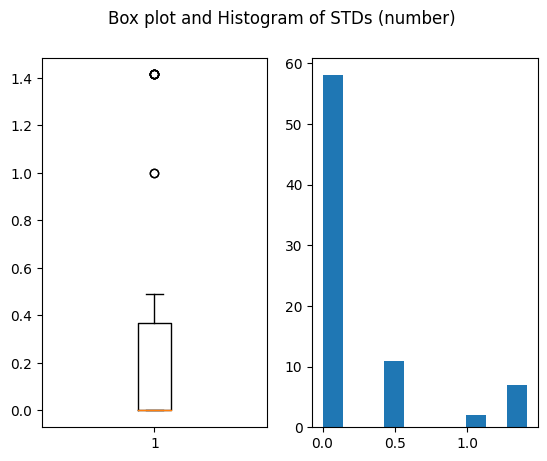

In [42]:
# Plot the distribution of the transformed outlier columns
for num in column_vald:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_vald_sqrt.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_vald_sqrt.iloc[:,num:(num+1)])        # Histogram


#### Test Set

In [43]:
X_test_imputed.iloc[:,0:18].describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.0,86.000000,86.000000
mean,27.279070,2.418605,17.279070,2.543210,0.094118,0.920788,0.208252,0.631579,2.325687,0.164384,0.703151,0.080000,0.160000,0.053333,0.0,0.0,0.053333,0.026667
std,10.031305,1.269230,2.523542,1.680682,0.291992,4.195289,1.021208,0.456124,4.368348,0.343467,1.779016,0.254836,0.553917,0.211066,0.0,0.0,0.211066,0.151334
min,13.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,21.000000,2.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,24.500000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,30.750000,3.000000,18.750000,3.000000,0.000000,0.000000,0.000000,1.000000,2.325687,0.164384,0.703151,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
max,84.000000,7.000000,27.000000,11.000000,1.000000,28.000000,7.000000,1.000000,30.000000,1.000000,8.000000,1.000000,3.000000,1.000000,0.0,0.0,1.000000,1.000000


In [44]:
X_test_imputed.iloc[:,18:].describe(include = 'all')

,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,86.0,86.0,86.0,86.0,86.000000,86.0,86.0,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.0,0.0,0.0,0.0,0.026667,0.0,0.0,0.05814,6.000000,6.000000,0.011628,0.011628,0.011628,0.023256,0.023256,0.069767,0.093023
std,0.0,0.0,0.0,0.0,0.151334,0.0,0.0,0.23538,0.766965,0.766965,0.107833,0.107833,0.107833,0.151599,0.151599,0.256249,0.292169
min,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.00000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We apply the same methods to identify the columns with outliers in the validation set.

In [45]:
# Identify the columns with outliers 
# Stnadard deviation threshold = 3
# Max Mean Ratio threshold = 3
column_test = []
Outliers(X_test_imputed, column_test, std_dev_threshold = 3, max_mean_ratio_threshold = 3)
print("Columns with outliers (index): ",column_test)

Age Standard Deviation:  10.031305308049921
Age Max Mean Ratio:  3.079283887468031 

Num of pregnancies Standard Deviation:  1.6806818134390256
Num of pregnancies Max Mean Ratio:  4.325242718446602 

Smokes (years) Standard Deviation:  4.19528858634444
Smokes (years) Max Mean Ratio:  30.40873961954802 

Smokes (packs/year) Standard Deviation:  1.0212076373968313
Smokes (packs/year) Max Mean Ratio:  33.613152460403754 

Hormonal Contraceptives (years) Standard Deviation:  4.368348013153026
Hormonal Contraceptives (years) Max Mean Ratio:  12.8994150753394 

IUD (years) Standard Deviation:  1.7790155087855748
IUD (years) Max Mean Ratio:  11.37736216637444 

STDs (number) Standard Deviation:  0.5539165365032577
STDs (number) Max Mean Ratio:  18.749999999999996 

Columns with outliers (index):  [0, 3, 5, 6, 8, 10, 12]


The identified columns with outliers are:
- Column[0]: Age
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)

From the plots below, we can see that the distributions of the columns stated above are skewed to the right, and outliers are indeed present.

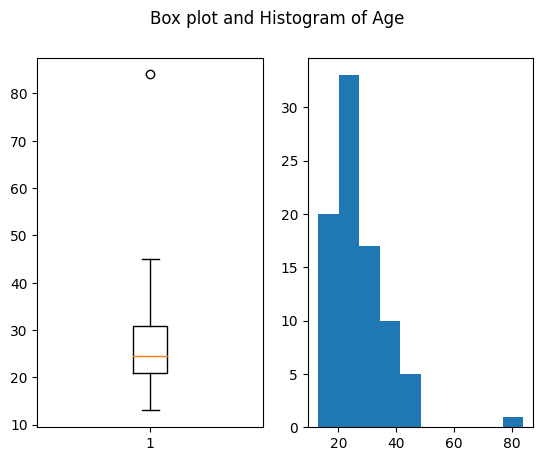

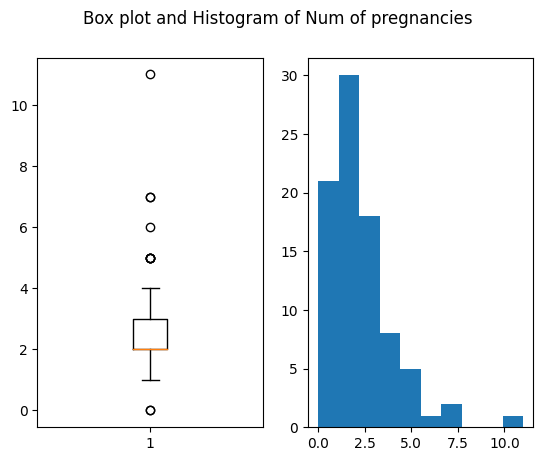

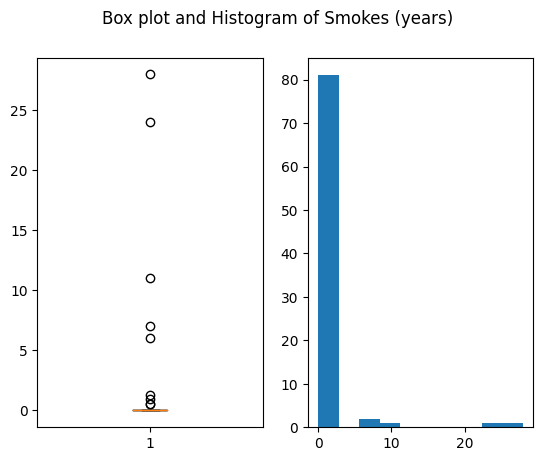

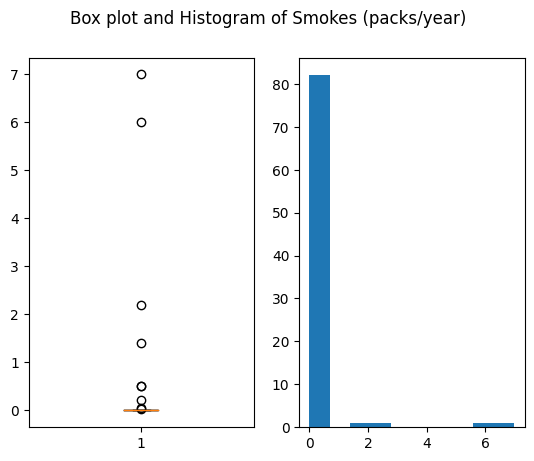

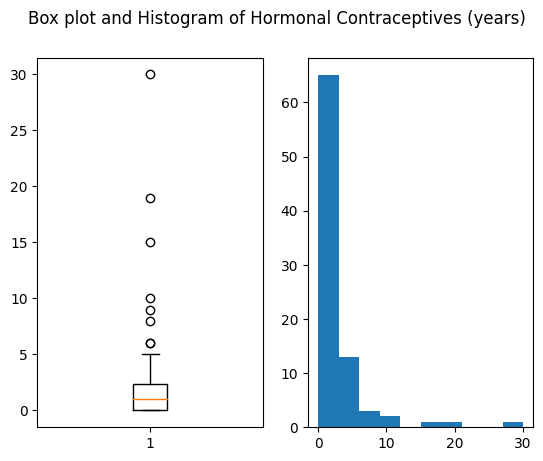

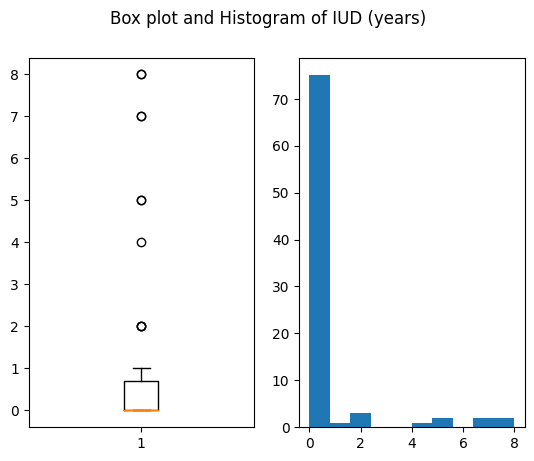

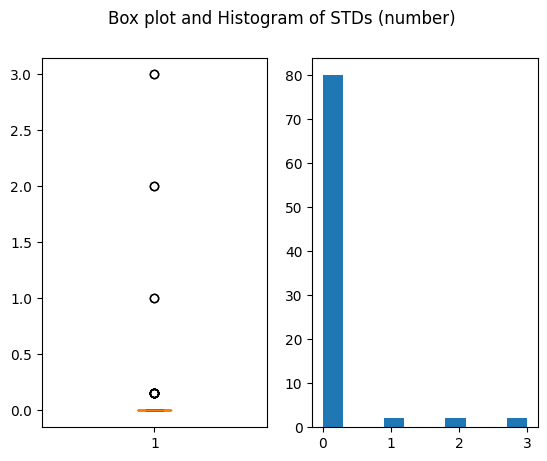

In [46]:
X_test_outlier = X_test_imputed.copy()

# Plot the distribution of the outlier columns
for num in column_test:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_test_outlier.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_test_outlier.iloc[:,num:(num+1)])        # Histogram

In [47]:
# A copy of X_vald_sqrt where square root transformation will be applied
X_test_sqrt = X_test_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_test_sqrt.iloc[:,column_test] = np.sqrt(X_test_sqrt.iloc[:,column_test])
X_test_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,5.477226,2.0,17.0,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.557439,4.0,16.0,1.732051,1.0,5.291503,2.645751,0.000000,0.000000,1.000000,...,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.795832,2.0,14.0,2.645751,1.0,1.125599,0.716381,0.631579,1.525020,0.164384,...,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.164414,2.0,19.0,2.236068,0.0,0.000000,0.000000,1.000000,5.477226,0.164384,...,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.477226,3.0,22.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,4.898979,3.0,17.0,1.732051,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,6.324555,1.0,20.0,2.645751,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,6.708204,2.0,18.0,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,5.000000,3.0,17.0,1.732051,0.0,0.000000,0.000000,1.000000,1.732051,0.000000,...,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


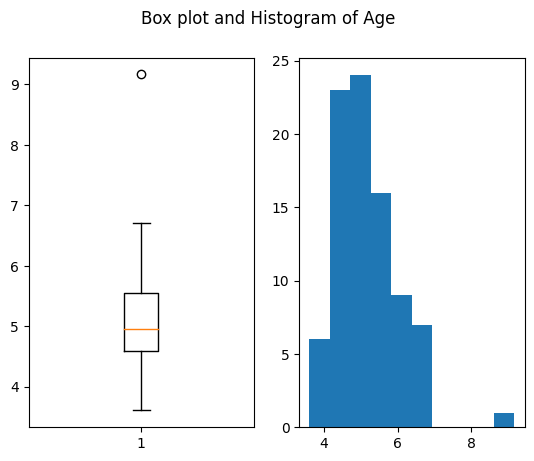

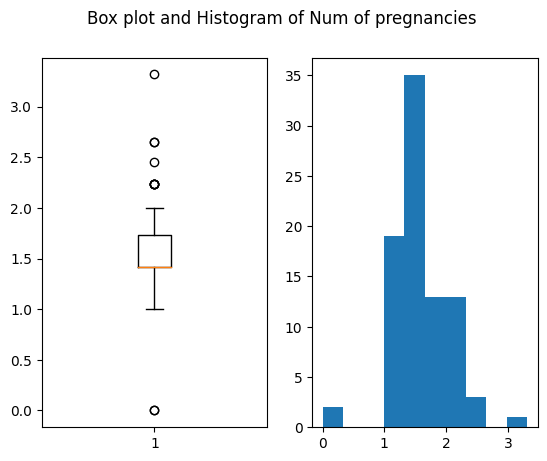

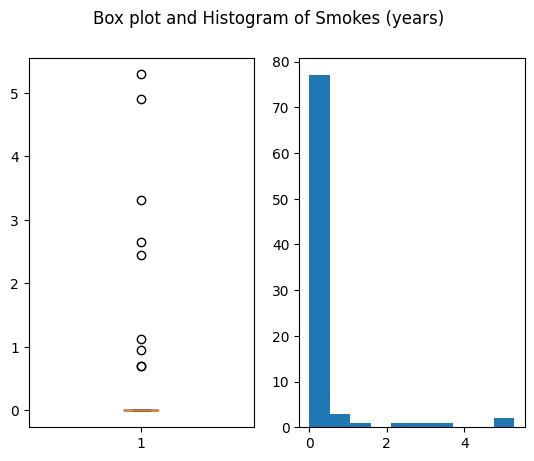

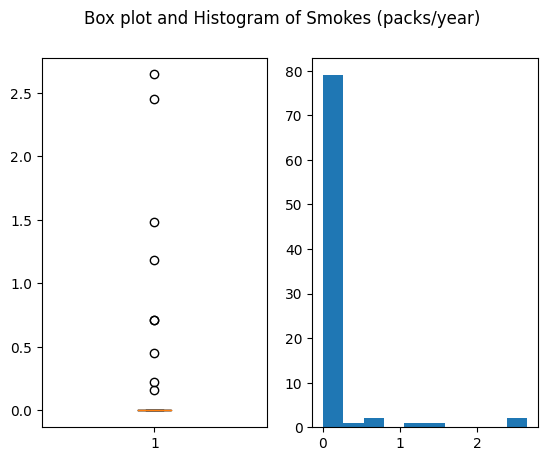

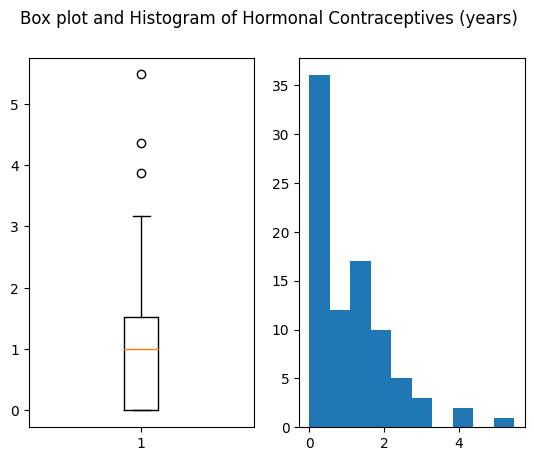

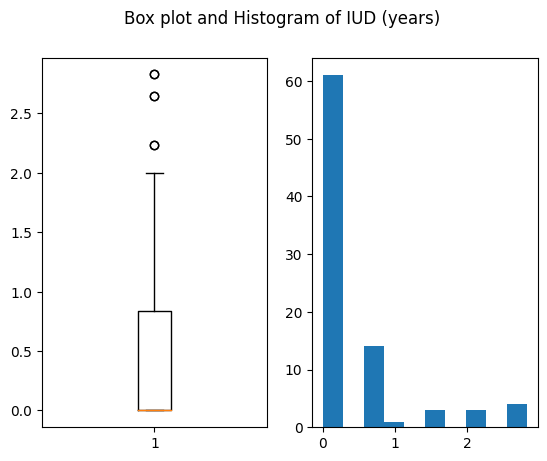

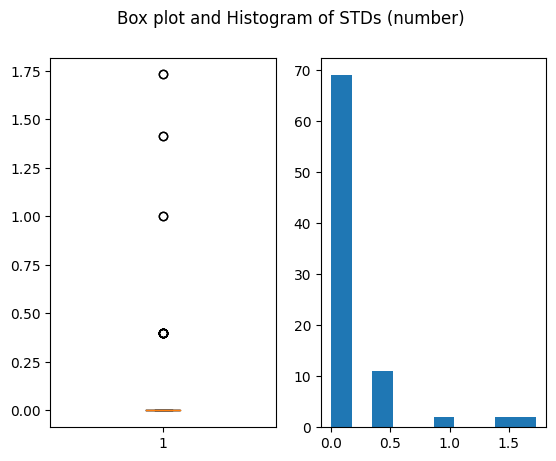

In [48]:
# Plot the distribution of the transformed outlier columns
for num in column_test:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_test_sqrt.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_test_sqrt.iloc[:,num:(num+1)])        # Histogram


### Imbalanced Data

#### Training Set

In [49]:
# Display the number of values for each class in y
y_train.value_counts()

Biopsy
0    652
1     42
Name: count, dtype: int64

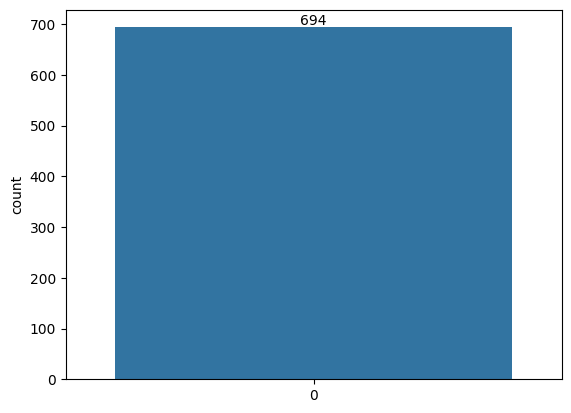

In [50]:
# Plot the graph to visualize the imbalance of the target column
y_train_countplot = sns.countplot(y_train)

for container in y_train_countplot.containers:
    y_train_countplot.bar_label(container)

As we observe from the numbers and graph above, we can see that there is an extreme uneven distribution of values for class 0 and 1. The majority class is 94%（722 out of 772 records) with a negative biopsy diagnosis, while the minority class is only 6% (50 out of 772 records) with a positive biopsy diagnosis. This may cause a biased prediction by our classification models.

Thus, we will deal with this imbalance by oversampling the minority class by resampling, using the resample() function from the sklearn.utils library.

In [51]:
# Reset index for y_train to concatenate with X_train_sqrt
y_train_reset_index = (y_train.reset_index()).drop('index', axis = 1)
y_train_reset_index

,Biopsy
0,0
1,0
2,0
3,0
4,0
...,...
689,0
690,0
691,0
692,0


In [52]:
# Combining X_train and y_vald into a dataframe for easy operation
train = pd.concat([X_train_sqrt, y_train_reset_index], axis = 1)
train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,6.324555,1.414214,21.0,2.000000,0.0,0.000000,0.000000,1.0,0.500000,0.000000,...,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4.472136,2.236068,17.0,1.000000,1.0,0.707107,0.716381,0.0,0.000000,0.000000,...,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5.000000,1.414214,17.0,0.000000,0.0,0.000000,0.000000,1.0,0.282843,0.000000,...,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5.744563,1.594261,16.0,2.000000,0.0,0.000000,0.000000,1.0,1.732051,0.000000,...,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3.872983,1.414214,15.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,6.633250,1.732051,15.0,1.508068,1.0,1.125599,1.673320,0.0,0.000000,0.106489,...,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
690,4.358899,1.000000,19.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
691,5.477226,1.732051,15.0,0.000000,1.0,4.000000,2.828427,0.0,0.000000,0.000000,...,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
692,4.690416,1.000000,17.0,1.414214,0.0,0.000000,0.000000,1.0,0.400000,1.000000,...,2.449490,2.368580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [53]:
# Create two different dataframe for class 0 and 1
train_major = train[(train['Biopsy']==0)]  # class 0 is the majority class
train_minor = train[(train['Biopsy']==1)]  # class 1 is the minority class

# Oversample the minority class with the number of majority class = 722
train_minor_upsampled = resample(train_minor, replace=True, n_samples = 722, random_state = 42)

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_minor_upsampled, train_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together
train_upsampled = shuffle(train_upsampled)

train_upsampled['Biopsy']

239    1
331    1
461    0
357    1
542    1
      ..
359    0
129    1
135    1
576    0
631    0
Name: Biopsy, Length: 1374, dtype: int64

In [54]:
# Check if the value for each class is balanced
train_upsampled['Biopsy'].value_counts()

Biopsy
1    722
0    652
Name: count, dtype: int64

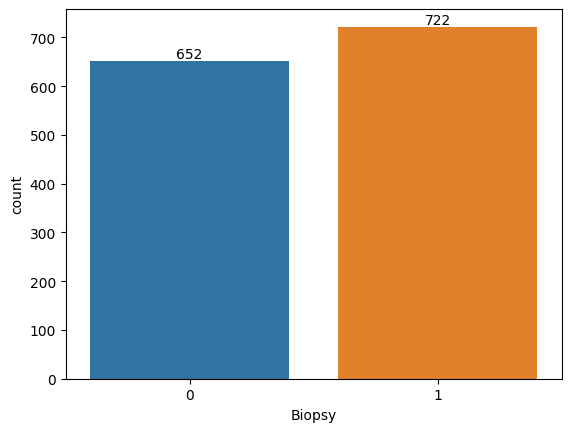

In [55]:
# Visualise the balanced data
y_train_countplot = sns.countplot(data = train_upsampled, x = 'Biopsy')

for container in y_train_countplot.containers:
    y_train_countplot.bar_label(container)

As shown above, the class distribution is now balanced, with 722 records respectively for both class 0 and class 1.

In [56]:
train_upsampled.shape

(1374, 36)

In [57]:
# Split the dataframe back into feature columns and target column
X_train_balanced = train_upsampled.drop('Biopsy', axis = 1)
y_train_balanced = train_upsampled['Biopsy']

In [58]:
X_train_balanced.shape

(1374, 35)

In [59]:
y_train_balanced.shape

(1374,)

Repeat the steps separately for validation set and test set.

#### Validation Set

In [60]:
# Display the number of values for each class in y
y_vald.value_counts()

Biopsy
0    70
1     8
Name: count, dtype: int64

In [61]:
# Reset index for y_vald to concatenate with X_vald_sqrt
y_vald_reset_index = (y_vald.reset_index()).drop('index', axis = 1)

# Combining X_train and y_train into a dataframe for easy operation
vald = pd.concat([X_vald_sqrt, y_vald_reset_index], axis = 1)

# Create two different dataframe for class 0 and 1
vald_major = vald[(vald['Biopsy']==0)]  # class 0 is the majority class
vald_minor = vald[(vald['Biopsy']==1)]  # class 1 is the minority class

# Oversample the minority class with the number of majority class = 81
vald_minor_upsampled = resample(vald_minor, replace=True, n_samples = 81, random_state = 42)

# Combine majority class with upsampled minority class
vald_upsampled = pd.concat([vald_minor_upsampled, vald_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together
vald_upsampled = shuffle(vald_upsampled)

vald_upsampled['Biopsy']

16    1
25    1
9     0
25    1
74    0
     ..
12    1
26    0
36    1
56    0
59    0
Name: Biopsy, Length: 151, dtype: int64

In [62]:
# Check if the value for each class is balanced
vald_upsampled['Biopsy'].value_counts()

Biopsy
1    81
0    70
Name: count, dtype: int64

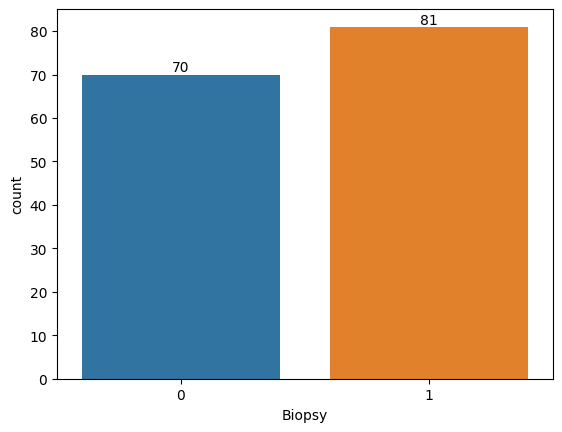

In [63]:
# Visualise the balanced data
y_vald_countplot = sns.countplot(data = vald_upsampled, x = "Biopsy")

for container in y_vald_countplot.containers:
    y_vald_countplot.bar_label(container)


In [64]:
vald_upsampled.shape

(151, 36)

In [65]:
# Split the dataframe back into feature columns and target column
X_vald_balanced = vald_upsampled.drop('Biopsy', axis = 1)
y_vald_balanced = vald_upsampled['Biopsy']

In [66]:
X_vald_balanced.shape

(151, 35)

In [67]:
y_vald_balanced.shape

(151,)

#### Test Set

In [68]:
# Display the number of values for each class in y
y_test.value_counts()

Biopsy
0    81
1     5
Name: count, dtype: int64

In [69]:
# Reset index for y_test to concatenate with X_test_sqrt
y_test_reset_index = (y_test.reset_index()).drop('index', axis = 1)

# Combining X_train and y_train into a dataframe for easy operation
test = pd.concat([X_test_sqrt, y_test_reset_index], axis = 1)

# Create two different dataframe for class 0 and 1
test_major = test[(test['Biopsy']==0)]  # class 0 is the majority class
test_minor = test[(test['Biopsy']==1)]  # class 1 is the minority class

# Oversample the minority class with the number of majority class = 81
test_minor_upsampled = resample(test_minor, replace=True, n_samples = 81, random_state = 42)

# Combine majority class with upsampled minority class
test_upsampled = pd.concat([test_minor_upsampled, test_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together
test_upsampled = shuffle(test_upsampled)

test_upsampled['Biopsy']

34    0
81    0
61    1
58    1
70    0
     ..
26    0
80    1
61    1
45    1
6     0
Name: Biopsy, Length: 162, dtype: int64

In [70]:
# Check if the value for each class is balanced
test_upsampled['Biopsy'].value_counts()

Biopsy
0    81
1    81
Name: count, dtype: int64

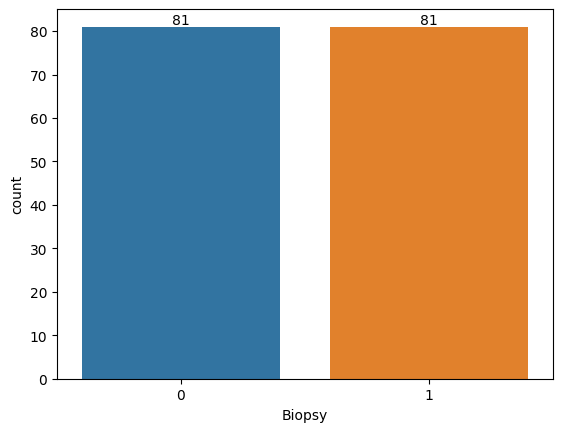

In [71]:
# Visualise the balanced data
y_test_countplot = sns.countplot(data = test_upsampled, x = "Biopsy")

for container in y_test_countplot.containers:
    y_test_countplot.bar_label(container)

In [72]:
test_upsampled.shape

(162, 36)

In [73]:
# Split the dataframe back into feature columns and target column
X_test_balanced = test_upsampled.drop('Biopsy', axis = 1)
y_test_balanced = test_upsampled['Biopsy']

In [74]:
X_test_balanced.shape

(162, 35)

In [75]:
y_test_balanced.shape

(162,)

### Data Normalization

In [76]:
columns_need_norm = [] # Columns in the dataframe that needs to be normalized

# Function for Normalisation using MinMaxScaler
def Norm_MinMaxScaler(df):
    for num in columns_need_norm:
        df_copy = df
        scaler = MinMaxScaler()
        df_copy.iloc[:,num:(num+1)] = scaler.fit_transform(df_copy.iloc[:,num:(num+1)])
    df_normalized = pd.DataFrame(df_copy, columns = df.columns)
    return df_normalized

In [77]:
X_train_sqrt.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,...,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,5.125553,1.534161,17.023256,1.437244,0.152493,0.409237,0.227869,0.643564,1.069486,0.106489,...,0.087263,2.427942,2.346832,0.024496,0.010086,0.024496,0.030259,0.043228,0.085014,0.047550
std,0.776384,0.433921,2.814523,0.457054,0.356633,1.047964,0.666761,0.447874,1.039352,0.287259,...,0.288588,0.324419,0.320466,0.154694,0.099996,0.154694,0.171424,0.203516,0.279104,0.212967
min,3.741657,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.472136,1.414214,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.449490,2.368580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.099020,1.414214,17.000000,1.414214,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,2.449490,2.368580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.656854,1.732051,18.000000,1.732051,0.000000,0.000000,0.000000,1.000000,1.490804,0.000000,...,0.000000,2.449490,2.368580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.888194,5.291503,32.000000,3.162278,1.000000,6.082763,6.082763,1.000000,4.690416,1.000000,...,1.732051,4.690416,4.690416,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
X_train_balanced.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,...,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000
mean,5.308649,1.525931,17.202431,1.517927,0.172180,0.564177,0.294120,0.680228,1.242676,0.168504,...,0.151791,2.418045,2.345749,0.083697,0.030568,0.083697,0.083697,0.292576,0.502911,0.171033
std,0.802069,0.403595,2.671325,0.422046,0.373917,1.334088,0.755501,0.450526,1.293012,0.362507,...,0.361415,0.435417,0.431450,0.277034,0.172206,0.277034,0.277034,0.455111,0.500174,0.376675
min,3.741657,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.582576,1.414214,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.449490,2.368580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.291503,1.414214,17.000000,1.508068,0.000000,0.000000,0.000000,1.000000,0.818535,0.000000,...,0.000000,2.449490,2.368580,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.916080,1.732051,18.000000,1.732051,0.000000,0.000000,0.000000,1.000000,1.732051,0.106489,...,0.000000,2.449490,2.368580,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,8.888194,5.291503,32.000000,3.162278,1.000000,6.082763,6.082763,1.000000,4.690416,1.000000,...,1.732051,4.690416,4.690416,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the max values of each column, we can see that the following columns from both balanced data and imbalanced data needs to be normalised:

- Column[0]: Age
- Column[1]: Number of sexual partners
- Column[2]: First sexual intercourse
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)
- Column[25]: STDs: Number of diagnosis
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis


Imbalanced Data

In [79]:
# Columns identified that needs normalization
columns_need_norm = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_norm = Norm_MinMaxScaler(X_train_sqrt)
X_vald_norm = Norm_MinMaxScaler(X_vald_sqrt)
X_test_norm = Norm_MinMaxScaler(X_test_sqrt)

In [80]:
X_train_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.501871,0.096519,0.500000,0.632456,0.0,0.000000,0.000000,1.0,0.106600,0.000000,...,0.57735,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.141936,0.288027,0.318182,0.316228,1.0,0.116248,0.117772,0.0,0.000000,0.000000,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.244503,0.096519,0.318182,0.000000,0.0,0.000000,0.000000,1.0,0.060302,0.000000,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.389175,0.138474,0.272727,0.632456,0.0,0.000000,0.000000,1.0,0.369274,0.000000,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.025517,0.096519,0.227273,0.316228,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0.561852,0.170581,0.227273,0.476893,1.0,0.185047,0.275092,0.0,0.000000,0.106489,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,0.119933,0.000000,0.409091,0.316228,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691,0.337230,0.170581,0.227273,0.000000,1.0,0.657596,0.464991,0.0,0.000000,0.000000,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692,0.184349,0.000000,0.318182,0.447214,0.0,0.000000,0.000000,1.0,0.085280,1.000000,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
X_vald_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.044269,0.500000,0.117647,0.408248,1.0,0.229416,0.091287,1.000000,0.063246,0.000000,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.870675,0.166667,0.294118,0.707107,0.0,0.000000,0.000000,1.000000,0.974679,0.000000,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.283467,0.166667,0.235294,0.408248,0.0,0.000000,0.000000,1.000000,0.158114,0.000000,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.424178,0.166667,0.117647,0.707107,1.0,0.512989,0.182574,1.000000,0.591608,0.000000,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.732981,0.166667,0.470588,0.577350,0.0,0.000000,0.000000,1.000000,0.316228,0.000000,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.554014,0.333333,0.176471,0.707107,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.750000,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.087085,0.000000,0.176471,0.408248,0.0,0.000000,0.000000,1.000000,0.223607,0.000000,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75,0.615567,0.254505,0.352941,0.577350,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.319819,0.166667,0.294118,0.408248,0.0,0.000000,0.000000,0.632353,0.352230,0.104478,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
X_test_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.336656,0.166667,0.285714,0.301511,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.530953,0.500000,0.214286,0.522233,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.214095,0.166667,0.071429,0.797724,1.0,0.212718,0.270767,0.631579,0.278429,0.164384,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.460260,0.166667,0.428571,0.674200,0.0,0.000000,0.000000,1.000000,1.000000,0.164384,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.336656,0.333333,0.642857,0.301511,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.232648,0.333333,0.285714,0.522233,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.489065,0.000000,0.500000,0.797724,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.558071,0.166667,0.357143,0.603023,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,0.250818,0.333333,0.285714,0.522233,0.0,0.000000,0.000000,1.000000,0.316228,0.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Balanced Data

In [83]:
# Columns identified that needs normalization
columns_need_norm = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_norm_balanced = Norm_MinMaxScaler(X_train_balanced)
X_vald_norm_balanced = Norm_MinMaxScaler(X_vald_balanced)
X_test_norm_balanced = Norm_MinMaxScaler(X_test_balanced)

In [84]:
X_train_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
239,0.422502,0.288027,0.409091,0.447214,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,1.0,0.0
331,0.184349,0.170581,0.227273,0.316228,0.0,0.000000,0.000000,1.0,0.213201,0.0,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,1.0,1.0,1.0
461,0.204832,0.096519,0.227273,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357,0.301143,0.096519,0.409091,0.447214,0.0,0.000000,0.000000,1.0,0.138170,1.0,...,0.57735,0.445953,0.445953,0.0,0.0,0.0,0.0,1.0,1.0,0.0
542,0.470755,0.096519,0.227273,0.632456,0.0,0.000000,0.000000,1.0,0.852803,0.0,...,0.00000,0.392771,0.370847,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.097344,0.000000,0.363636,0.316228,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,0.224874,0.000000,0.590909,0.316228,0.0,0.000000,0.000000,1.0,0.184637,0.0,...,0.57735,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
135,0.224874,0.096519,0.363636,0.632456,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.57735,0.270972,0.270972,0.0,0.0,0.0,0.0,1.0,1.0,0.0
576,0.204832,0.000000,0.409091,0.447214,0.0,0.000000,0.000000,1.0,0.174512,0.0,...,0.00000,0.392771,0.370847,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
X_vald_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
16,0.246239,0.166667,0.117647,0.816497,1.0,0.397360,0.500000,1.0,0.158114,0.0,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.522441,0.500000,0.352941,0.816497,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.897160,0.333333,0.294118,0.816497,0.0,0.000000,0.000000,1.0,0.707107,0.0,...,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.522441,0.500000,0.352941,0.816497,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,0.087085,0.000000,0.176471,0.408248,0.0,0.000000,0.000000,1.0,0.223607,0.0,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0.128583,0.166667,0.176471,0.408248,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,1.0,1.0,0.0
26,0.168878,0.333333,0.176471,0.408248,0.0,0.000000,0.000000,1.0,0.170294,0.0,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.319819,0.166667,0.176471,0.577350,1.0,0.512989,0.322749,1.0,0.547723,0.0,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56,0.675164,0.500000,0.235294,0.707107,0.0,0.000000,0.000000,1.0,0.632456,1.0,...,0.0,0.321429,0.321429,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
X_test_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
34,0.352941,0.333333,0.142857,0.738549,1.0,0.133631,0.059761,1.0,0.447214,0.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.232648,0.333333,0.285714,0.522233,0.0,0.000000,0.000000,1.0,0.182574,0.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.250818,0.833333,0.285714,0.426401,0.0,0.000000,0.000000,1.0,0.258199,0.000000,...,1.0,0.222222,0.222222,0.0,0.0,0.0,0.0,0.0,1.0,1.0
58,0.460260,0.333333,0.357143,0.603023,0.0,0.000000,0.000000,1.0,0.577350,1.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,1.0,1.0
70,0.214095,0.333333,0.285714,0.426401,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.175736,0.166667,0.428571,0.480834,0.0,0.000000,0.000000,1.0,0.129099,0.164384,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.303250,0.666667,0.142857,0.603023,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.444444,0.444444,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,0.250818,0.833333,0.285714,0.426401,0.0,0.000000,0.000000,1.0,0.258199,0.000000,...,1.0,0.222222,0.222222,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45,0.175736,0.333333,0.285714,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.444444,0.444444,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Data Standardization 

In [87]:
columns_need_std = [] # Columns in the dataframe that needs to be standardized

# Function for Standardization using StandardScaler
def Std_StandardScaler(df):
    for num in columns_need_norm:
        df_copy = df
        scaler = StandardScaler()
        df_copy.iloc[:,num:(num+1)] = scaler.fit_transform(df_copy.iloc[:,num:(num+1)])
    df_normalized = pd.DataFrame(df_copy, columns = df.columns)
    return df_normalized

In [88]:
print(X_train_norm_balanced)

          Age  Number of sexual partners  First sexual intercourse   
239  0.422502                   0.288027                  0.409091  \
331  0.184349                   0.170581                  0.227273   
461  0.204832                   0.096519                  0.227273   
357  0.301143                   0.096519                  0.409091   
542  0.470755                   0.096519                  0.227273   
..        ...                        ...                       ...   
359  0.097344                   0.000000                  0.363636   
129  0.224874                   0.000000                  0.590909   
135  0.224874                   0.096519                  0.363636   
576  0.204832                   0.000000                  0.409091   
631  0.301143                   0.170581                  0.227273   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)   
239            0.447214     0.0        0.000000             0.000000  \
331            

In [89]:
# Print to see which has columns has continuous values, which has only categorical values.
for column in X_train_norm_balanced.columns:
    unique_values = X_train_norm_balanced[column].unique()
    print(f"{column}'s unique values: {unique_values}\n")

Age's unique values: [0.42250204 0.18434889 0.20483174 0.30114332 0.47075472 0.38917533
 0.50187105 0.07411746 0.40596123 0.05019737 0.26374281 0.11993338
 0.4548894  0.28261626 0.66059391 0.22487395 0.43880819 0.60506651
 0.24450278 0.16339498 0.31934239 0.09734377 0.33723029 0.02551734
 0.67413197 0.14193594 0.53221871 0.48641263 0.35482247 0.37213312
 0.51713741 0.6191631  0.         0.56185201 0.63311361 0.54712152
 0.89865143 0.59081914 1.         0.57641605 0.64692247 0.76546391]

Number of sexual partners's unique values: [0.28802685 0.17058147 0.09651947 0.         0.33775809 0.23301862
 0.13847377 0.42605756 0.38349069 0.46603723 0.6694586  0.50385095
 1.        ]

First sexual intercourse's unique values: [0.40909091 0.22727273 0.86363636 0.36363636 0.27272727 0.5
 0.18181818 0.72727273 0.31818182 0.63636364 0.81818182 0.59090909
 0.45454545 0.54545455 0.13636364 0.77272727 0.04545455 0.68181818
 0.3192389  0.09090909 0.         1.        ]

Num of pregnancies's unique values

In [90]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

We want to standardize only numeric data and not categorical data, therefore only the following columns are chosen, similar to those that are normalized:

- Column[0]: Age
- Column[1]: Number of sexual partners
- Column[2]: First sexual intercourse
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)
- Column[25]: STDs: Number of diagnosis
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis

##### Imbalanced Data

In [91]:
# Columns identified that needs normalization
columns_need_std = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_std = Std_StandardScaler(X_train_norm)
X_vald_std = Std_StandardScaler(X_vald_norm)
X_test_std = Std_StandardScaler(X_test_norm)

In [92]:
X_train_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,1.545455,-0.276627,1.413956,1.232155,0.0,-0.390788,-0.342001,1.0,-0.548319,0.000000,...,3.165045,-4.404706,-4.205763,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842223,1.618759,-0.008269,-0.957347,1.0,0.284442,0.733194,0.0,-1.029735,0.000000,...,-0.302597,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.161832,-0.276627,-0.008269,-3.146849,0.0,-0.390788,-0.342001,1.0,-0.757405,0.000000,...,-0.302597,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.797873,0.138603,-0.363825,1.232155,0.0,-0.390788,-0.342001,1.0,0.637939,0.000000,...,-0.302597,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.614501,-0.276627,-0.719381,-0.957347,0.0,-0.390788,-0.342001,0.0,-1.029735,0.000000,...,-0.302597,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,1.943347,0.456379,-0.719381,0.155068,1.0,0.684068,2.169435,0.0,-1.029735,0.106489,...,-0.302597,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,-0.988180,-1.231899,0.702844,-0.957347,0.0,-0.390788,-0.342001,0.0,-1.029735,0.000000,...,-0.302597,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691,0.453289,0.456379,-0.719381,-3.146849,1.0,3.428889,3.903100,0.0,-1.029735,0.000000,...,-0.302597,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692,-0.560871,-1.231899,-0.008269,-0.050425,0.0,-0.390788,-0.342001,1.0,-0.644602,1.000000,...,-0.302597,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
X_vald_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,-1.607664,1.040064e+00,-0.863587,-0.855568,1.0,0.621190,0.238716,1.000000,-0.768473,0.000000,...,-0.313993,-1.003733e-15,-1.003733e-15,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.791453,-3.721329e-01,0.203197,0.939164,0.0,-0.369956,-0.326312,1.000000,2.938256,0.000000,...,-0.313993,-1.003733e-15,-1.003733e-15,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.623810,-3.721329e-01,-0.152398,-0.855568,0.0,-0.369956,-0.326312,1.000000,-0.382651,0.000000,...,-0.313993,-1.003733e-15,-1.003733e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.045049,-3.721329e-01,-0.863587,0.939164,1.0,1.846314,0.803744,1.000000,1.380335,0.000000,...,-0.313993,-1.003733e-15,-1.003733e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.225100,-3.721329e-01,1.269980,0.159938,0.0,-0.369956,-0.326312,1.000000,0.260386,0.000000,...,-0.313993,-1.003733e-15,-1.003733e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.488983,3.339654e-01,-0.507992,0.939164,0.0,-0.369956,-0.326312,0.000000,-1.025688,0.000000,...,3.184785,3.874640e+00,3.874640e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,-1.431554,-1.078231e+00,-0.507992,-0.855568,0.0,-0.369956,-0.326312,1.000000,-0.116296,0.000000,...,-0.313993,-1.003733e-15,-1.003733e-15,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75,0.742159,2.351780e-16,0.558791,0.159938,0.0,-0.369956,-0.326312,0.000000,-1.025688,0.000000,...,-0.313993,-1.003733e-15,-1.003733e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,-0.474290,-3.721329e-01,0.203197,-0.855568,0.0,-0.369956,-0.326312,0.632353,0.406805,0.104478,...,-0.313993,-1.003733e-15,-1.003733e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
X_test_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.378828,-0.331744,-0.111235,-1.021258,0.0,-0.277978,-0.264419,1.000000,-0.058782,0.000000,...,-0.248452,6.552197e-16,6.552197e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.636361,1.253257,-0.509828,0.434864,1.0,5.445524,5.732522,0.000000,-0.974270,1.000000,...,-0.248452,6.552197e-16,6.552197e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.414420,-0.331744,-1.307013,2.252304,1.0,0.939515,1.359353,0.631579,0.421868,0.164384,...,-0.248452,6.552197e-16,6.552197e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.178820,-0.331744,0.685950,1.437404,0.0,-0.277978,-0.264419,1.000000,4.040066,0.164384,...,-0.248452,6.552197e-16,6.552197e-16,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.378828,0.460756,1.881728,-1.021258,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,6.552197e-16,6.552197e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.294340,0.460756,-0.111235,0.434864,0.0,-0.277978,-0.264419,1.000000,-0.058782,0.000000,...,-0.248452,6.552197e-16,6.552197e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,1.365249,-1.124245,1.084543,2.252304,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,6.552197e-16,6.552197e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,1.811875,-0.331744,0.287357,0.967841,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,6.552197e-16,6.552197e-16,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,-0.176736,0.460756,-0.111235,0.434864,0.0,-0.277978,-0.264419,1.000000,0.611402,0.000000,...,-0.248452,6.552197e-16,6.552197e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Balanced Data

In [95]:
# Columns identified that needs normalization
columns_need_std = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_std_balanced = Std_StandardScaler(X_train_norm_balanced)
X_vald_std_balanced = Std_StandardScaler(X_vald_norm_balanced)
X_test_std_balanced = Std_StandardScaler(X_test_norm_balanced)

In [96]:
X_train_std_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
239,0.757606,1.760169,0.673158,-0.245829,0.0,-0.423047,-0.389447,0.0,-0.961421,0.0,...,-0.420143,0.072244,0.052936,0.0,0.0,0.0,0.0,0.0,1.0,0.0
331,-0.771079,0.510895,-0.824771,-1.227629,0.0,-0.423047,-0.389447,1.0,-0.187751,0.0,...,-0.420143,0.072244,0.052936,0.0,0.0,0.0,0.0,1.0,1.0,1.0
461,-0.639601,-0.276907,-0.824771,-3.597904,0.0,-0.423047,-0.389447,0.0,-0.961421,0.0,...,-0.420143,0.072244,0.052936,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357,-0.021385,-0.276907,0.673158,-0.245829,0.0,-0.423047,-0.389447,1.0,-0.460026,1.0,...,2.347766,0.523153,0.695589,0.0,0.0,0.0,0.0,1.0,1.0,0.0
542,1.067336,-0.276907,-0.824771,1.142646,0.0,-0.423047,-0.389447,1.0,2.133258,0.0,...,-0.420143,0.072244,0.052936,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,-1.329557,-1.303590,0.298676,-1.227629,0.0,-0.423047,-0.389447,0.0,-0.961421,0.0,...,-0.420143,0.072244,0.052936,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,-0.510952,-1.303590,2.171087,-1.227629,0.0,-0.423047,-0.389447,1.0,-0.291404,0.0,...,2.347766,-3.257940,-3.120267,0.0,0.0,0.0,0.0,0.0,1.0,1.0
135,-0.510952,-0.276907,0.298676,1.142646,0.0,-0.423047,-0.389447,0.0,-0.961421,0.0,...,2.347766,-0.960453,-0.801656,0.0,0.0,0.0,0.0,1.0,1.0,0.0
576,-0.639601,-1.303590,0.673158,-0.245829,0.0,-0.423047,-0.389447,1.0,-0.328145,0.0,...,-0.420143,0.072244,0.052936,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
X_vald_std_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
16,-0.613695,-0.366993,-0.772753,1.490419,1.0,1.236876,2.312019,1.0,-0.274404,0.0,...,-0.220479,-1.396560e-15,-1.396560e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.682508,1.191647,0.874021,1.490419,0.0,-0.506717,-0.486749,0.0,-0.944996,0.0,...,-0.220479,-1.396560e-15,-1.396560e-15,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2.441044,0.412327,0.462328,1.490419,0.0,-0.506717,-0.486749,1.0,2.053980,0.0,...,4.535574,8.535812e+00,8.535812e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.682508,1.191647,0.874021,1.490419,0.0,-0.506717,-0.486749,0.0,-0.944996,0.0,...,-0.220479,-1.396560e-15,-1.396560e-15,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,-1.360593,-1.146313,-0.361060,-0.997986,0.0,-0.506717,-0.486749,1.0,0.003364,0.0,...,-0.220479,-1.396560e-15,-1.396560e-15,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,-1.165846,-0.366993,-0.361060,-0.997986,0.0,-0.506717,-0.486749,0.0,-0.944996,0.0,...,-0.220479,-1.396560e-15,-1.396560e-15,0.0,0.0,0.0,0.0,1.0,1.0,0.0
26,-0.976746,0.412327,-0.361060,-0.997986,0.0,-0.506717,-0.486749,1.0,-0.222747,0.0,...,-0.220479,-1.396560e-15,-1.396560e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,-0.268386,-0.366993,-0.361060,0.032745,1.0,1.744252,1.319848,1.0,1.378001,0.0,...,-0.220479,-1.396560e-15,-1.396560e-15,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56,1.399229,1.191647,0.050634,0.823653,0.0,-0.506717,-0.486749,1.0,1.737369,1.0,...,-0.220479,-1.396560e-15,-1.396560e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
X_test_std_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
34,0.643723,-0.198104,-1.036709,1.630116,1.0,0.832240,0.294433,1.0,1.344027,0.000000,...,-0.466953,0.328521,0.328521,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,-0.284087,-0.198104,-0.012643,0.515601,0.0,-0.198962,-0.189573,1.0,0.002367,0.000000,...,-0.466953,0.328521,0.328521,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,-0.143941,1.653408,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.0,0.385766,0.000000,...,2.141543,-1.888994,-1.888994,0.0,0.0,0.0,0.0,0.0,1.0,1.0
58,1.471460,-0.198104,0.499390,0.931850,0.0,-0.198962,-0.189573,1.0,2.003789,1.000000,...,-0.466953,0.328521,0.328521,0.0,0.0,0.0,0.0,0.0,1.0,1.0
70,-0.427185,-0.198104,-0.012643,0.021852,0.0,-0.198962,-0.189573,0.0,-0.923242,0.000000,...,-0.466953,0.328521,0.328521,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,-0.723037,-0.815275,1.011423,0.302300,0.0,-0.198962,-0.189573,1.0,-0.268738,0.164384,...,-0.466953,0.328521,0.328521,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.260463,1.036237,-1.036709,0.931850,0.0,-0.198962,-0.189573,0.0,-0.923242,0.000000,...,-0.466953,0.328521,0.328521,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,-0.143941,1.653408,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.0,0.385766,0.000000,...,2.141543,-1.888994,-1.888994,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45,-0.723037,-0.198104,-0.012643,-2.175077,0.0,-0.198962,-0.189573,0.0,-0.923242,0.000000,...,-0.466953,0.328521,0.328521,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

Feature selection is done to select the features that most correlated with our target feature. 
So that we can :

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

- Improves Accuracy: Less misleading data means modeling accuracy improves.

- Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

We will be conducting the feaature selection by 
1. Building a Correlation Matrix Heatmap (using Pearson Correlation Coefficient)
2. Identifying the features with correlation coefficient closer to 0 (weaker correlation)
3. Drop the columns with weak correlation

At the end of this Feature Selection Section,

Imbalanced data will be represented by:
- X_train
- X_vald
- X_test
- y_train
- y_vald
- y_test

Balanced data will be represented by:
- X_train_balanced
- X_vald_balanced
- X_test_balanced
- y_train_balanced
- y_vald_balanced
- y_test_balanced

##### 1. Correlation Matrix Heatmap

In [99]:
# Concatenate X_train_std and y_train
train_corr = pd.concat([X_train_std, y_train_reset_index], axis = 1)
train_corr

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,1.545455,-0.276627,1.413956,1.232155,0.0,-0.390788,-0.342001,1.0,-0.548319,0.000000,...,-4.404706,-4.205763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.842223,1.618759,-0.008269,-0.957347,1.0,0.284442,0.733194,0.0,-1.029735,0.000000,...,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.161832,-0.276627,-0.008269,-3.146849,0.0,-0.390788,-0.342001,1.0,-0.757405,0.000000,...,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.797873,0.138603,-0.363825,1.232155,0.0,-0.390788,-0.342001,1.0,0.637939,0.000000,...,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-1.614501,-0.276627,-0.719381,-0.957347,0.0,-0.390788,-0.342001,0.0,-1.029735,0.000000,...,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,1.943347,0.456379,-0.719381,0.155068,1.0,0.684068,2.169435,0.0,-1.029735,0.106489,...,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
690,-0.988180,-1.231899,0.702844,-0.957347,0.0,-0.390788,-0.342001,0.0,-1.029735,0.000000,...,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
691,0.453289,0.456379,-0.719381,-3.146849,1.0,3.428889,3.903100,0.0,-1.029735,0.000000,...,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
692,-0.560871,-1.231899,-0.008269,-0.050425,0.0,-0.390788,-0.342001,1.0,-0.644602,1.000000,...,0.066466,0.067912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


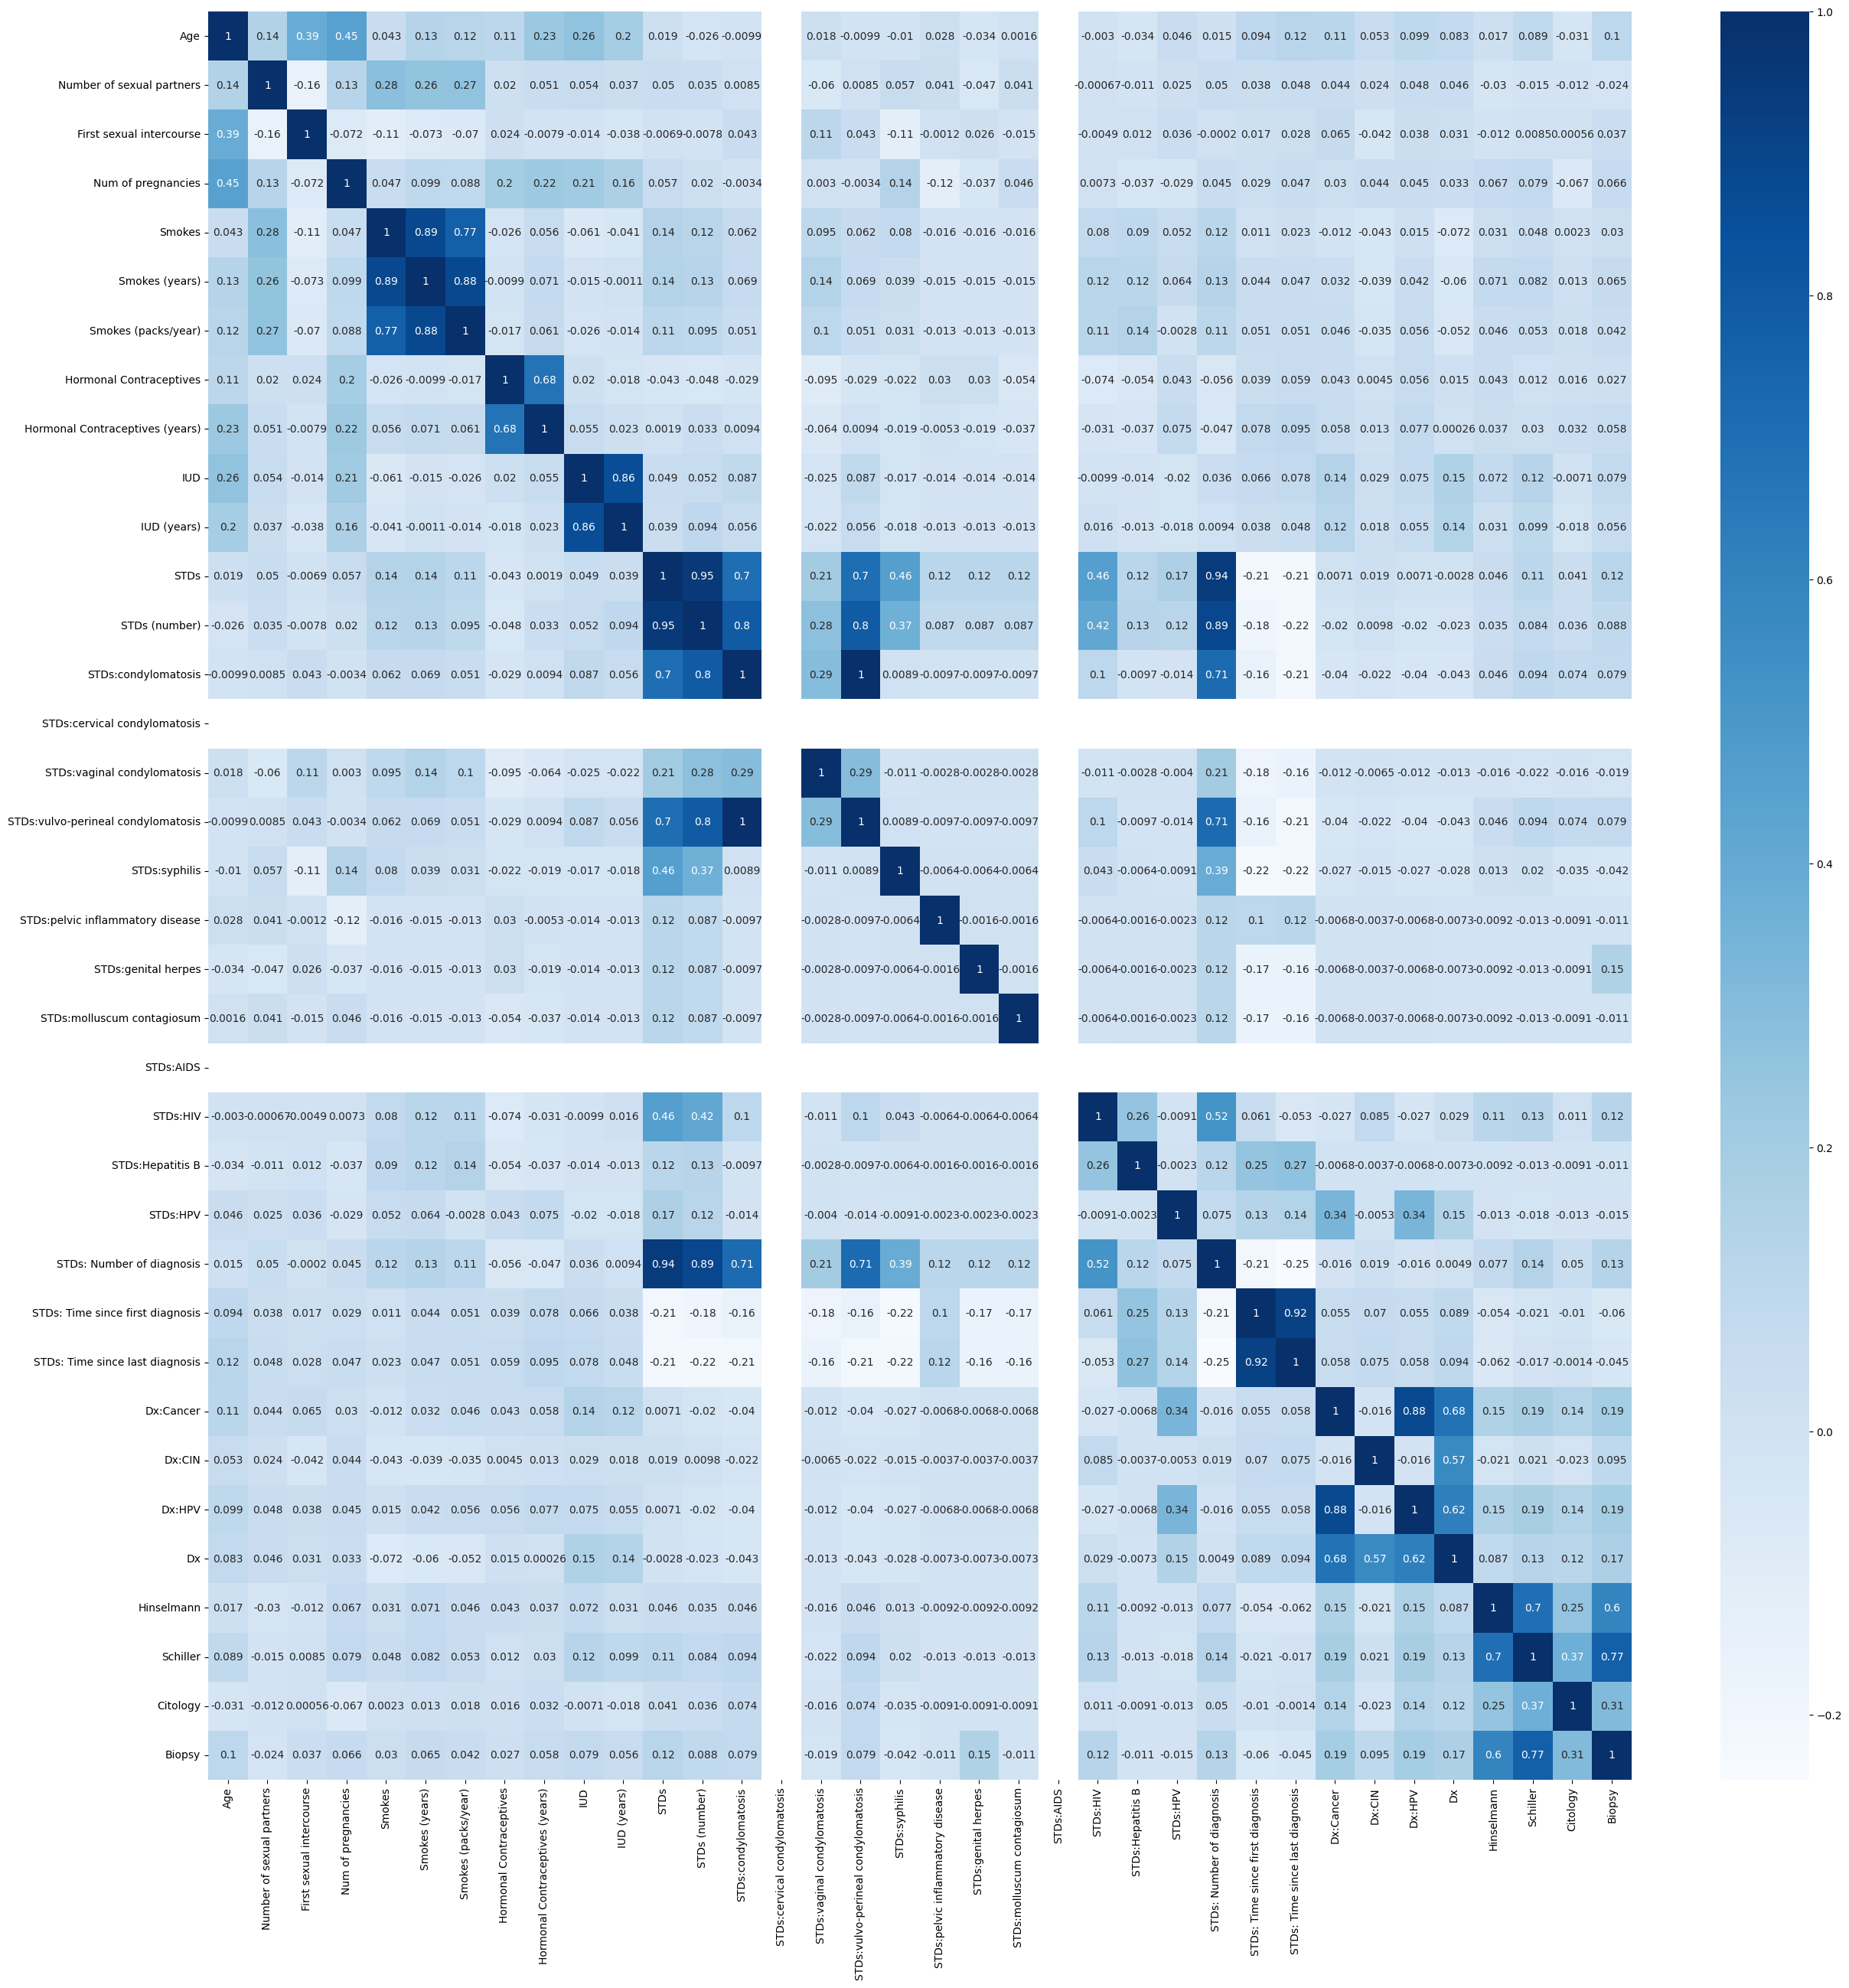

In [100]:
# Create a correlation matrix on the imbalanced training set
corr_matrix = train_corr.corr(method = 'pearson')
top_corr_features = corr_matrix.index

# Plot the correlation matrix heat map
plt.figure(figsize=(30,30))
g=sns.heatmap(train_corr[top_corr_features].corr(),annot=True,cmap="Blues")
plt.show()

##### 2. Identifying the low correlation features

In [101]:
# List out the correlation coefficients of the features and the target value by ascending order
corr_biopsy = pd.DataFrame(corr_matrix['Biopsy'])
corr_biopsy.sort_values("Biopsy")

,Biopsy
STDs: Time since first diagnosis,-0.059516
STDs: Time since last diagnosis,-0.044824
STDs:syphilis,-0.041891
Number of sexual partners,-0.024317
STDs:vaginal condylomatosis,-0.018548
STDs:HPV,-0.015132
STDs:molluscum contagiosum,-0.010691
STDs:Hepatitis B,-0.010691
STDs:pelvic inflammatory disease,-0.010691
Hormonal Contraceptives,0.026604


We can identify that the columns 'STDs:cervical condylomatosis' and 'STDs:AIDS' in this dataframe. On the other hand, columns 'STDs:HPV', 'STDs:molluscum contagiosum', 'STDs:pelvic inflammatory disease', 'STDs:Hepatitis B', 'Hormonal Contraceptives' and 'First sexual intercourse' all have a low magnitude of correlation coefficient regardless of the direction, which are all not more than 0.02.



In [102]:
drop_features = ['STDs:cervical condylomatosis','STDs:AIDS','STDs:HPV','STDs:molluscum contagiosum','STDs:pelvic inflammatory disease','STDs:Hepatitis B','Hormonal Contraceptives','First sexual intercourse']
drop_features_index = [df.columns.get_loc(col)for col in drop_features]
drop_features_index

[14, 21, 24, 20, 18, 23, 7, 2]

Thus, the identified columns to be dropped are:
- Column[2]: First sexual intercourse
- Column[7]: Hormonal Contraceptives
- Column[14]: STDs:cervical condylomatosis
- Column[18]: STDs:pelvic inflammatory disease
- Column[20]: STDs:molluscum contagiosum
- Column[21]: STDs:AIDS
- Column[23]: STDs:Hepatitis B
- Column[24]: STDs:HPV

##### 3. Drop low correlating features

In [103]:
# Drop the identified columns in the training, validation and test set of the imbalanced data
for string in drop_features:
    X_train = X_train_std.drop(axis = 1, columns = drop_features)
    X_vald = X_vald_std.drop(axis = 1, columns = drop_features)
    X_test = X_test_std.drop(axis = 1, columns = drop_features)

In [104]:
# Shapes of each sets after dropping the columns, from 35 columns --> 27 columns
print("X_train's shape:", X_train.shape)
print("X_vald's shape :", X_vald.shape)
print("X_test's shape :", X_test.shape)

X_train's shape: (694, 27)
X_vald's shape : (78, 27)
X_test's shape : (86, 27)


In [105]:
X_train.shape

(694, 27)

In [106]:
X_vald.shape

(78, 27)

In [107]:
X_test.shape

(86, 27)

In [108]:
# Repeat for training, validation and test set of the balanced data
for string in drop_features:
    X_train_balanced = X_train_std_balanced.drop(axis = 1, columns = drop_features)
    X_vald_balanced = X_vald_std_balanced.drop(axis = 1, columns = drop_features)
    X_test_balanced = X_test_std_balanced.drop(axis = 1, columns = drop_features)

In [109]:
print("After feature selection:")
print("X_train_balanced:", X_train_balanced.shape)
print("X_vald_balanced :", X_vald_balanced.shape)
print("X_test_balanced :", X_test_balanced.shape)
print("\nThe columns numbers are the same for each, 27.")

After feature selection:
X_train_balanced: (1374, 27)
X_vald_balanced : (151, 27)
X_test_balanced : (162, 27)

The columns numbers are the same for each, 27.


In [110]:
X_train_balanced.shape

(1374, 27)

In [111]:
X_vald_balanced.shape

(151, 27)

In [112]:
X_test_balanced.shape

(162, 27)

## Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description: Our group selected Decision Tree and Support Vector Machine(SVM), we built 2 predictive model to predict the target variable of cervical cancer dataset which is 'biopsy'

In [113]:
#Decision Tree

#Build the model 
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier()

In [114]:
#Predict on validation set
y_vald_pred= tree_model.predict(X_vald_balanced)


In [115]:
#Evaluate the performance
accuracy = accuracy_score(y_vald_balanced, y_vald_pred)
precision = precision_score(y_vald_balanced, y_vald_pred)
recall = recall_score(y_vald_balanced, y_vald_pred)
f1 = f1_score(y_vald_balanced, y_vald_pred)

In [116]:
#confusion matrix
conf_m =confusion_matrix (y_vald_balanced,y_vald_pred)

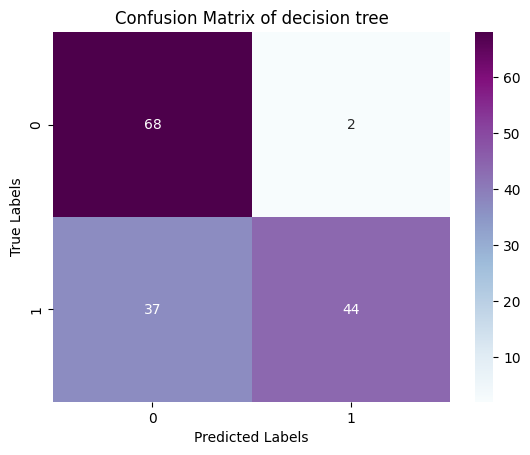

In [117]:
#visualize confusion matrix
sns.heatmap(conf_m, annot = True, fmt='d',cmap='BuPu')
plt.title('Confusion Matrix of decision tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [118]:
#Print accuracy,precision,recall and f1
print("Accuracy of decision tree:", accuracy)
print("Precision of decision tree:", precision)
print("Recall of decision tree:", recall)
print("F1 Score of decision tree:", f1)

Accuracy of decision tree: 0.7417218543046358
Precision of decision tree: 0.9565217391304348
Recall of decision tree: 0.5432098765432098
F1 Score of decision tree: 0.6929133858267716


In [119]:
# Predict on test set
y_test_pred= tree_model.predict(X_test_balanced)

In [120]:
# Evaluate decision tree model's performance on test set
test_accuracy = accuracy_score(y_test_balanced, y_test_pred)
print("Test Accuracy of decision tree:", test_accuracy)

Test Accuracy of decision tree: 0.654320987654321


## Support Vector Machine (SVM)
The second predictive model we have chose is Support Vector Machine (SVM). SVM algorithms determine the hyperplane boundary to classify data and make predictions. The three popular types of kernels used in SVM are:

<li> Linear Kernel
<li> Polynomial Kernel
<li> Radial Basis Function (RBF) Kernel
<li> Sigmoid Kernel

In [121]:
# Import svm model
from sklearn.svm import SVC

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#### Determine which kernel is the most suitable

In [122]:
# Define parameter grids for hyperparameter tuning
para_linear = {'C': [0.1, 1, 10]}
para_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
para_RBF = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
para_sigmoid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

In [123]:
# Perform hyperparameter tuning using grid search
clf_linear = GridSearchCV(SVC(kernel='linear'), para_linear, cv=5)
clf_poly = GridSearchCV(SVC(kernel='poly'), para_poly, cv=5)
clf_RBF = GridSearchCV(SVC(kernel='rbf'), para_RBF, cv=5)
clf_sigmoid = GridSearchCV(SVC(kernel='sigmoid'), para_sigmoid, cv=5)

### Test using unbalanced data

##### Linear Kernel Model Accuracy

In [124]:
# Train the model with linear kernel and find the best model
clf_linear.fit(X_train, y_train)
best_linear = clf_linear.best_estimator_

In [125]:
# Prediction on the validation set
y_pred_linear_vald = best_linear.predict(X_vald)
y_pred_linear_vald

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [126]:
# Prediction on the test set
y_pred_linear = best_linear.predict(X_test)
y_pred_linear

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

##### Polynomial Kernel Model Accuracy

In [127]:
# Train the model with polynomial kernel and find the best model
clf_poly.fit(X_train, y_train)
best_poly = clf_poly.best_estimator_

In [128]:
# Prediction on the validation set
y_pred_poly_vald = best_poly.predict(X_vald)
y_pred_poly_vald

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [129]:
# Prediction on the test set
y_pred_poly = best_poly.predict(X_test)
y_pred_poly

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

##### RBF Kernel Model Accuracy 

In [130]:
# Train the model with RBF kernel and find the best model
clf_RBF.fit(X_train, y_train)
best_RBF = clf_RBF.best_estimator_

In [131]:
# Prediction on the validation set
y_pred_RBF_vald = best_RBF.predict(X_vald)
y_pred_RBF_vald

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [132]:
# Prediction on the test set
y_pred_RBF = best_RBF.predict(X_test)
y_pred_RBF

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

##### Sigmoid Kernel Model Accuracy

In [133]:
# Train the model with sigmoid kernel and find the best model
clf_sigmoid.fit(X_train, y_train)
best_sigmoid = clf_sigmoid.best_estimator_

In [134]:
# Prediction on the validation set
y_pred_sigmoid_vald = best_sigmoid.predict(X_vald)
y_pred_sigmoid_vald

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [135]:
# Prediction on the test set
y_pred_sigmoid = best_sigmoid.predict(X_test)
y_pred_sigmoid

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

#### Accuracy on the validation sets

In [136]:
print("Accuracy for linear kernel:",metrics.accuracy_score(y_vald, y_pred_linear_vald))
print("Accuracy for polynomial kernel:",metrics.accuracy_score(y_vald, y_pred_poly_vald))
print("Accuracy for RBF kernel:",metrics.accuracy_score(y_vald, y_pred_RBF_vald))
print("Accuracy for sigmoid kernel:",metrics.accuracy_score(y_vald, y_pred_sigmoid_vald))

Accuracy for linear kernel: 0.9358974358974359
Accuracy for polynomial kernel: 0.8974358974358975
Accuracy for RBF kernel: 0.9358974358974359
Accuracy for sigmoid kernel: 0.8974358974358975


#### Accuracy on the test sets

In [137]:
print("Accuracy for linear kernel:",metrics.accuracy_score(y_test, y_pred_linear))
print("Accuracy for polynomial kernel:",metrics.accuracy_score(y_test, y_pred_poly))
print("Accuracy for RBF kernel:",metrics.accuracy_score(y_test, y_pred_RBF))
print("Accuracy for sigmoid kernel:",metrics.accuracy_score(y_test, y_pred_sigmoid))

Accuracy for linear kernel: 0.9418604651162791
Accuracy for polynomial kernel: 0.9302325581395349
Accuracy for RBF kernel: 0.9418604651162791
Accuracy for sigmoid kernel: 0.9069767441860465


### Test using the balanced data

##### Linear Kernel Model Accuracy

In [138]:
# Train the model with linear kernel and find the best model
clf_linear.fit(X_train_balanced, y_train_balanced)
best_linear1 = clf_linear.best_estimator_

In [139]:
# Prediction on the validation set
y1_pred_linear_vald = best_linear1.predict(X_vald_balanced)
y1_pred_linear_vald

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [140]:
# Prediction on the test set
y1_pred_linear = best_linear1.predict(X_test_balanced)
y1_pred_linear

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0])

##### Polynomial Kernel Model Accuracy

In [141]:
# Train the model with polynomial kernel and find the best model
clf_poly.fit(X_train_balanced, y_train_balanced)
best_poly1 = clf_poly.best_estimator_

In [142]:
# Prediction on the validation set
y1_pred_poly_vald = best_poly1.predict(X_vald_balanced)
y1_pred_poly_vald

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [143]:
# Prediction on the test set
y1_pred_poly = best_poly1.predict(X_test_balanced)
y1_pred_poly

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

##### RBF Kernel Model Accuracy

In [144]:
# Train the model with RBF kernel and find the best model
clf_RBF.fit(X_train_balanced, y_train_balanced)
best_RBF1 = clf_RBF.best_estimator_

In [145]:
# Prediction on the validation set
y1_pred_RBF_vald = best_RBF1.predict(X_vald_balanced)
y1_pred_RBF_vald

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [146]:
# Prediction on the test set
y1_pred_RBF = best_RBF1.predict(X_test_balanced)
y1_pred_RBF

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

##### Sigmoid Kernel Model Accuracy

In [147]:
# Train the model with sigmoid kernel and find the best model
clf_sigmoid.fit(X_train_balanced, y_train_balanced)
best_sigmoid1 = clf_sigmoid.best_estimator_

In [148]:
# Prediction on the validation set
y1_pred_sigmoid_vald = best_sigmoid1.predict(X_vald_balanced)
y1_pred_sigmoid_vald

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [149]:
# Prediction on the test set
y1_pred_sigmoid = best_sigmoid1.predict(X_test_balanced)
y1_pred_sigmoid

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0])

#### Accuracy on the validation sets

In [150]:
print("Accuracy for linear kernel:",metrics.accuracy_score(y_vald_balanced, y1_pred_linear_vald))
print("Accuracy for polynomial kernel:",metrics.accuracy_score(y_vald_balanced, y1_pred_poly_vald))
print("Accuracy for RBF kernel:",metrics.accuracy_score(y_vald_balanced, y1_pred_RBF_vald))
print("Accuracy for sigmoid kernel:",metrics.accuracy_score(y_vald_balanced, y1_pred_sigmoid_vald))

Accuracy for linear kernel: 0.8410596026490066
Accuracy for polynomial kernel: 0.6490066225165563
Accuracy for RBF kernel: 0.46357615894039733
Accuracy for sigmoid kernel: 0.8410596026490066


#### Accuracy on the test sets

In [151]:
print("Accuracy for linear kernel:",metrics.accuracy_score(y_test_balanced, y1_pred_linear))
print("Accuracy for polynomial kernel:",metrics.accuracy_score(y_test_balanced, y1_pred_poly))
print("Accuracy for RBF kernel:",metrics.accuracy_score(y_test_balanced, y1_pred_RBF))
print("Accuracy for sigmoid kernel:",metrics.accuracy_score(y_test_balanced, y1_pred_sigmoid))

Accuracy for linear kernel: 0.9197530864197531
Accuracy for polynomial kernel: 0.5432098765432098
Accuracy for RBF kernel: 0.5
Accuracy for sigmoid kernel: 0.7530864197530864


## Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description: